# Eﬀect of Normalization, Feature Extraction and Distance Metrics

## Tasks

### Importing Data

In [1]:
# Importing all the necessary libraries
import numpy as np
import pandas as pd
import random
import seaborn as sns
sns.set(style="ticks", color_codes=True)
from sklearn import neighbors
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

#Columns/Features names for future usage
D = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']
L = 'quality'
C = 'color'
DL = D + [L]        # feature names with color target value
DC = D + [C]        # feature names with quality target value
DLC = DL + [C]      # feature names with color and quality target value

# Loading The Red Wine Data set
wine_r = pd.read_csv("winequality-red.csv", sep=';')
# Loading The White Wine Data set
wine_w = pd.read_csv("winequality-white.csv", sep=';')
wine_w= wine_w.copy()
# Combining both datasets to get a single wine dataset with 11 features and 2 target values (color and quality)
wine_w[C]= np.zeros(wine_w.shape[0])
wine_r[C]= np.ones(wine_r.shape[0])
wine = pd.concat([wine_w,wine_r])

# tells us all the unique values quality target value
wine.quality.unique() 

array([6, 5, 7, 8, 4, 3, 9], dtype=int64)

### Train/Test Data Split and Normalization:

In [2]:
# I have combined Data split and Normalization section because I am performing first Normalization and then Data Split.
# performing Z-score normalization on the entire feature dataset
from scipy import stats

X = wine[D].values
y_c = np.ravel(wine[[C]])
y_l = np.ravel(wine[[L]])
# aplying zscore on the feature values
X = stats.zscore(X)

In [3]:
ran = 42     # defining variable for random_state
# Performing Train-Test split for color label(c)
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X, y_c, test_size=0.2, random_state = ran) 
# Performing Train-Test split for quality label(l)
X_train_l, X_test_l, y_train_l, y_test_l = train_test_split(X, y_l, test_size=0.2, random_state = ran)

Text(0.5, 1.01, 'Pair-Plot of z-score Normalized data with color as label')

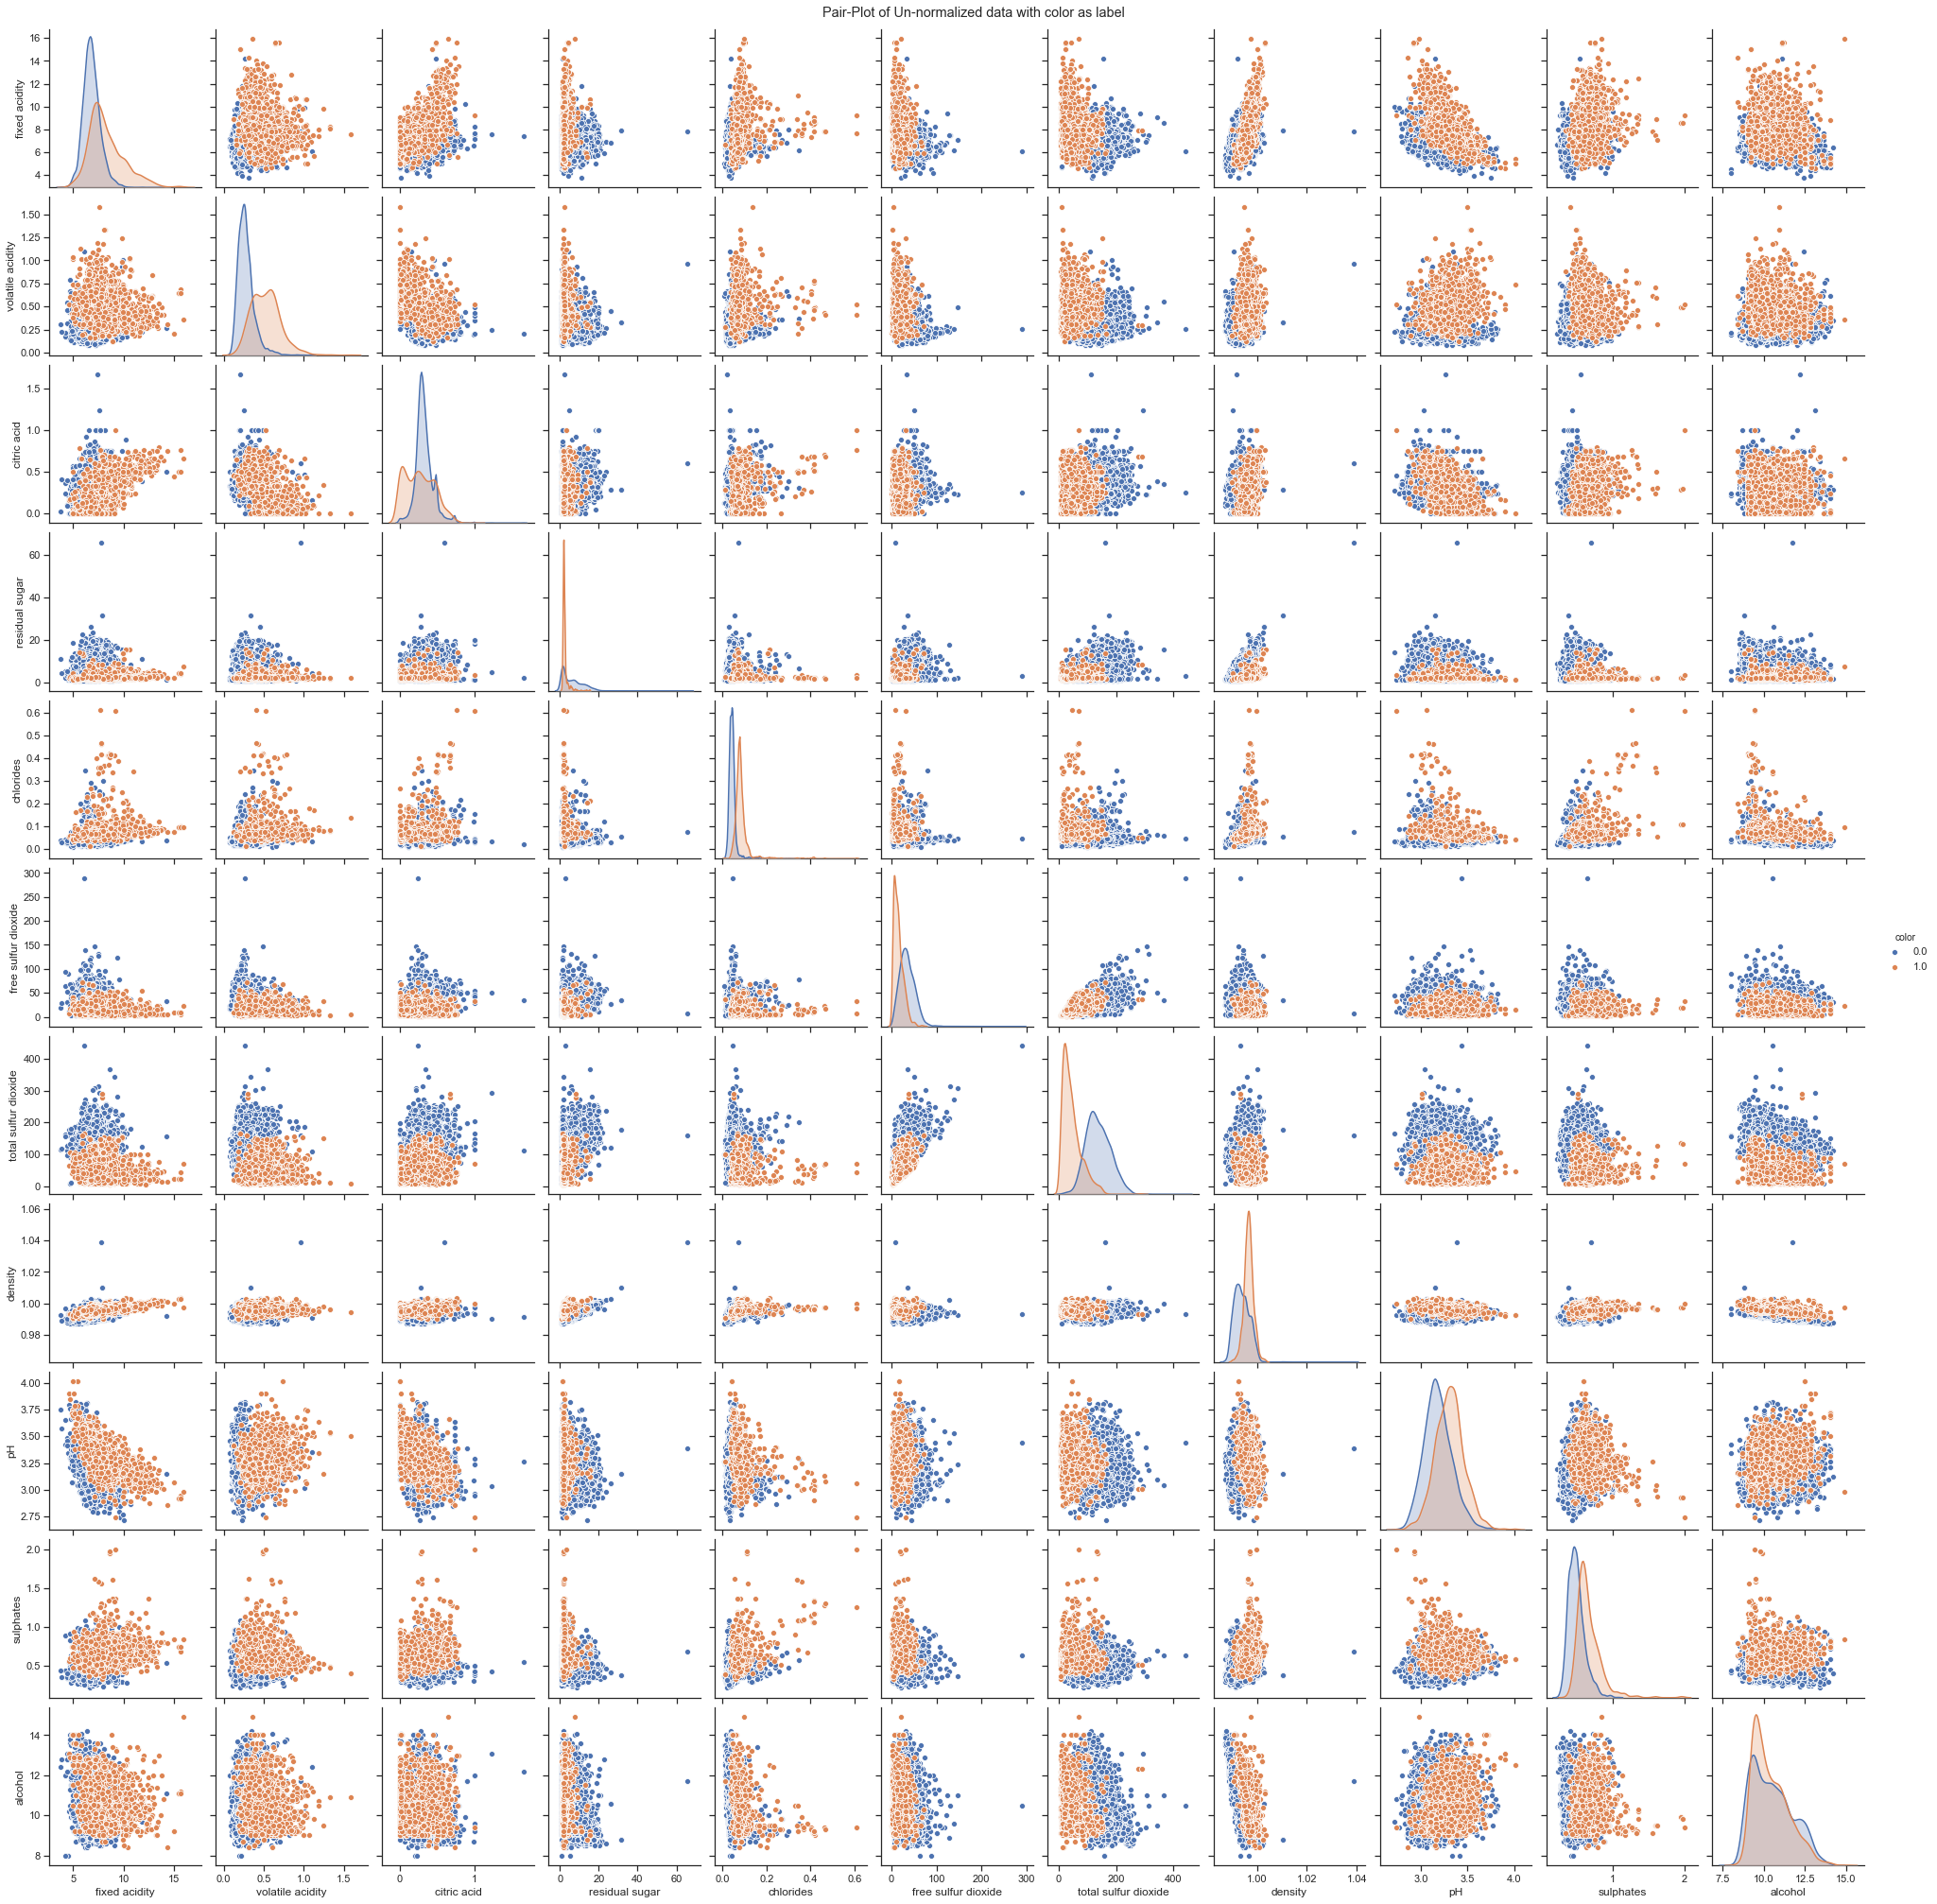

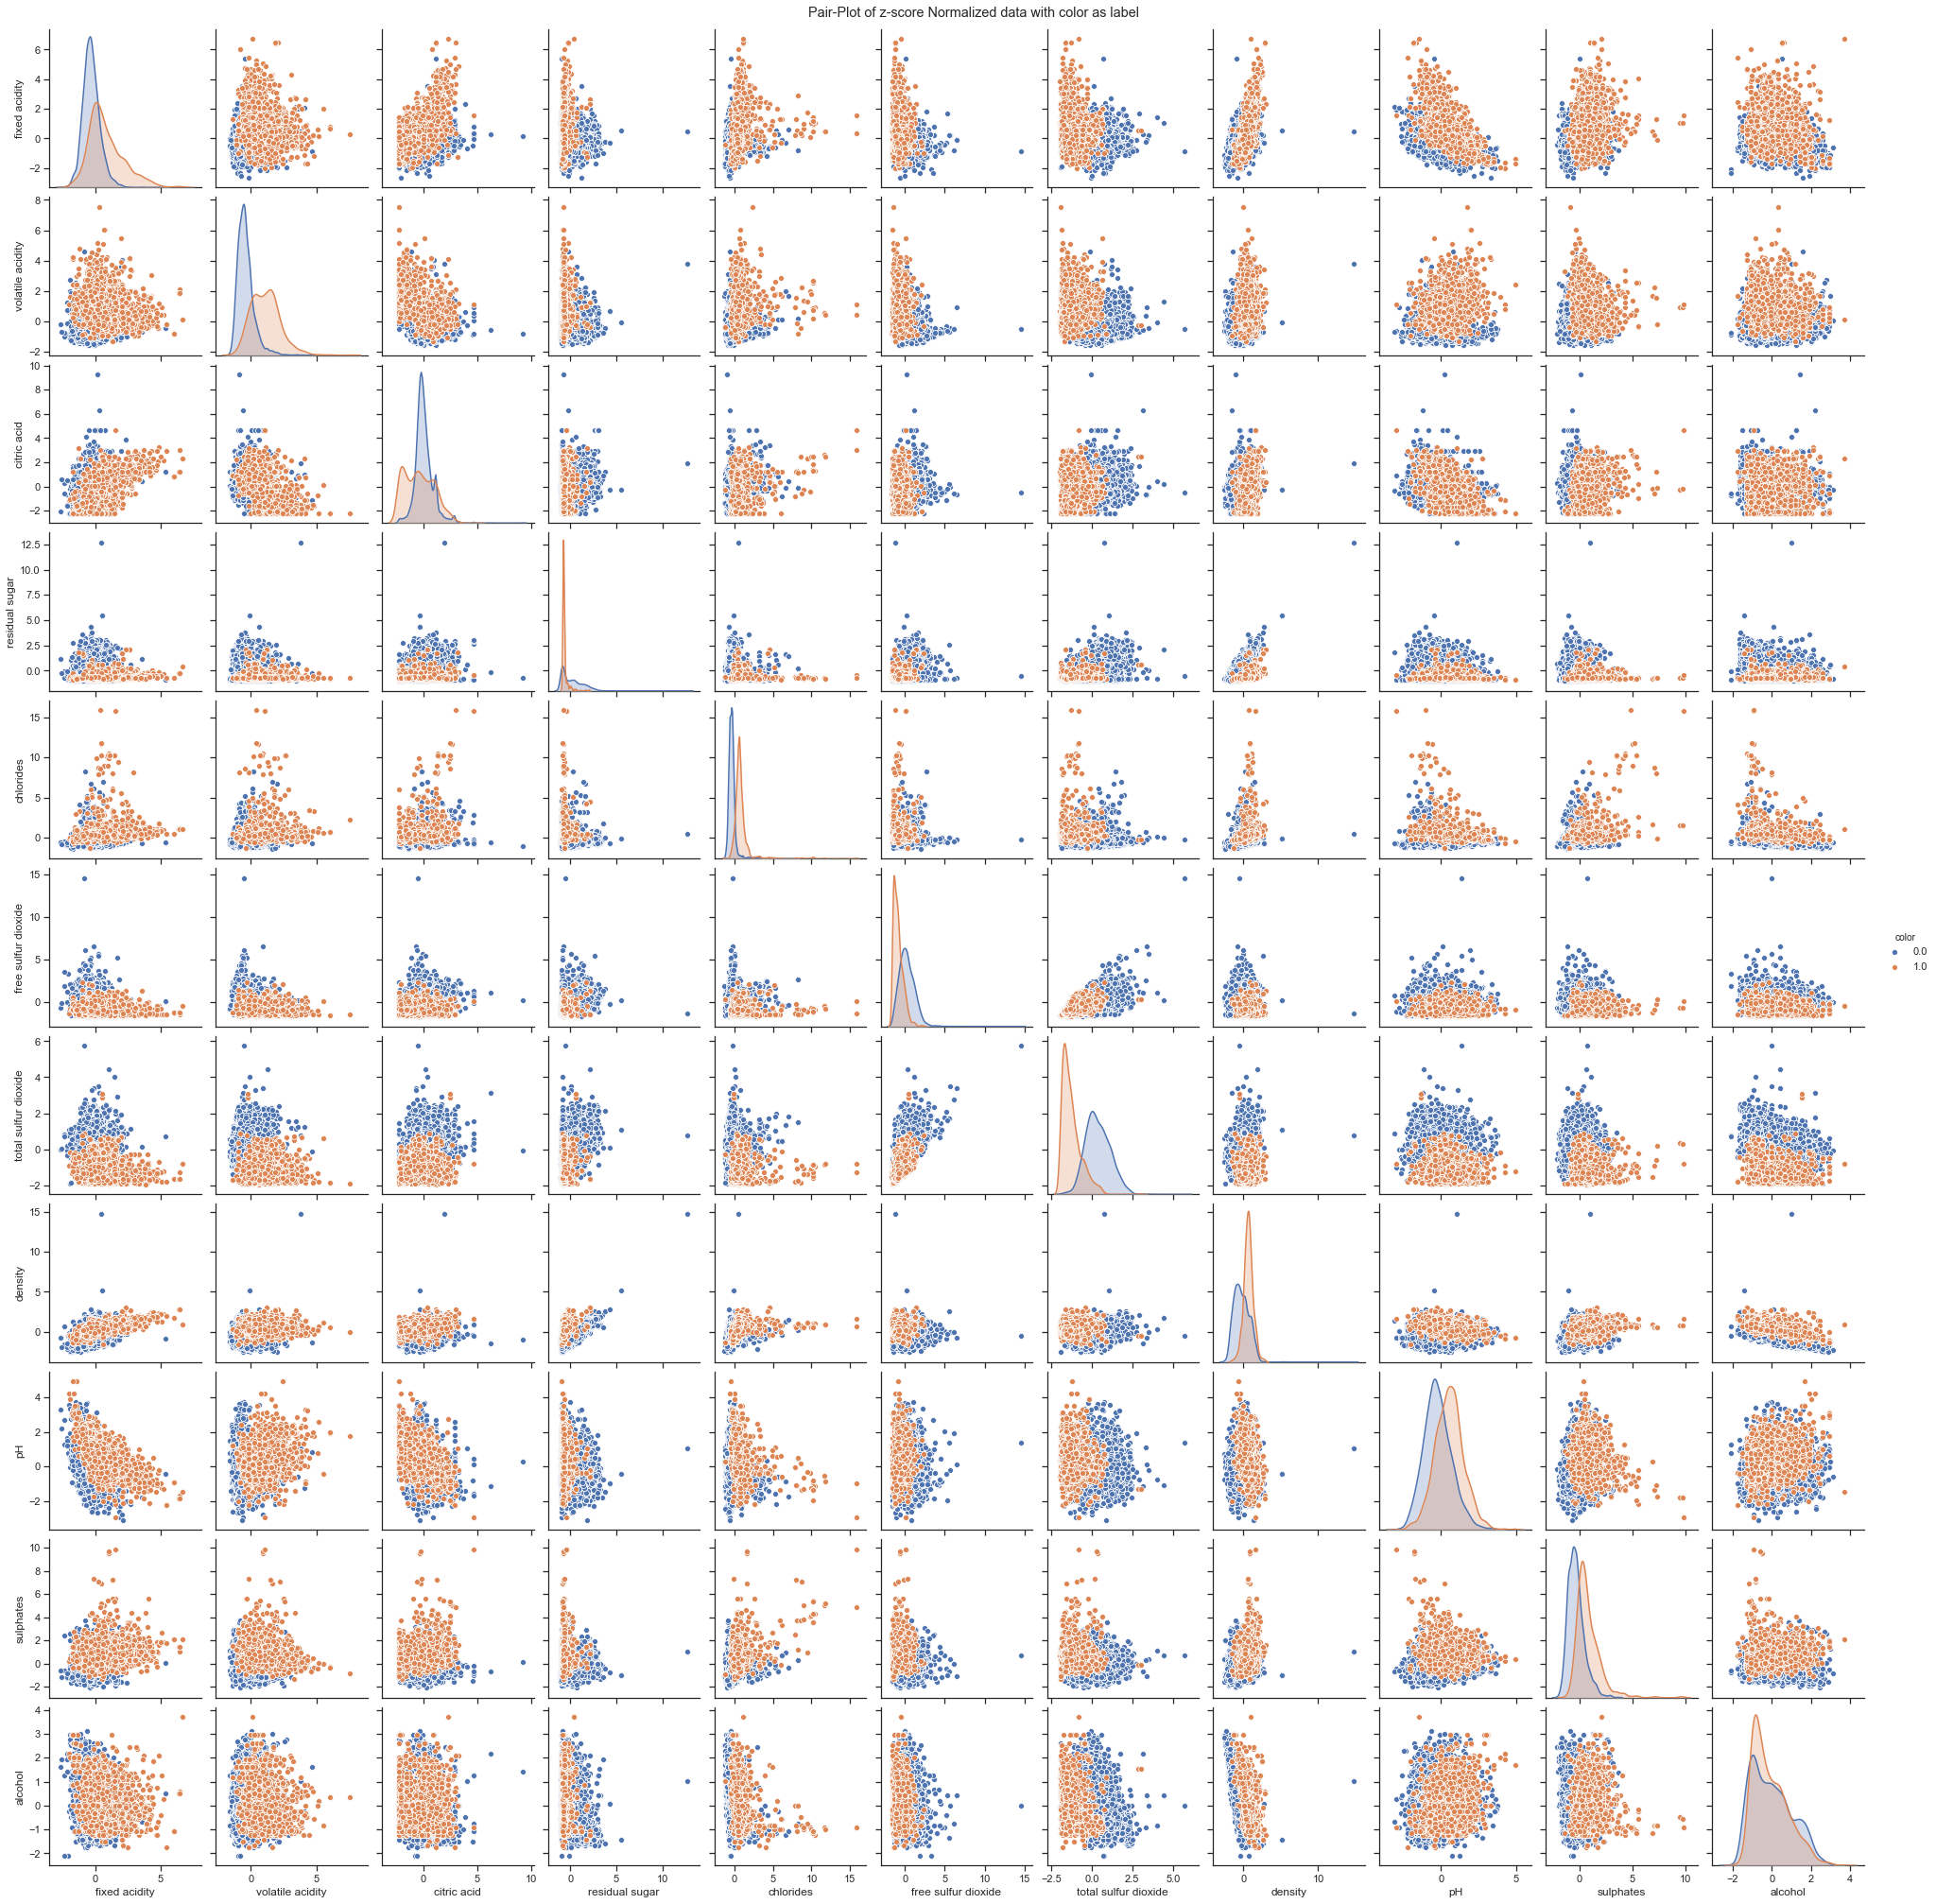

In [4]:
## pair plot of the Un-Normalized data
a = sns.pairplot(wine[DC],hue='color')
a.fig.suptitle("Pair-Plot of Un-normalized data with color as label", y=1.01)

## plotting  normalized data's pair plot using color as a label
zscore_with_color = pd.DataFrame(X,columns=D)
zscore_with_color['color'] = wine[C].values

b = sns.pairplot(zscore_with_color, hue='color')
b.fig.suptitle("Pair-Plot of z-score Normalized data with color as label", y=1.01)

 Text Answer: After plotting the pair plots of Z score Normalized data with un-normalized data I observed several things which are as written below. I have taken color as a label because it's easier to interpret the pair-plots compared to when we take quality as a label.
 
 - First, thing is that we don't see much difference in the pair-plots they almost look the same other than the pair plot of the Density feature, That's because in the un-normalized data the differece between min and max value is 0.05, and after the normalization the difference becomes 17.26. That's why we can see the difference in pair-plots of density feature.
 
 - Second, The main difference caused by the Z-score normalization is that after the normalization we can say that all the features are in a range of -3 to 17 approximately. Where before the normalization range of the features would vary by hundreds. 
 For Exmple: 
     - Range of total sulfur dioxide feature is from 6 to 440
     - Range of free sulfur dioxide feature is from 1 to 289
     - Range of chlorides feature is from 0.009 to 0.611
     - And Range of density feature is from 0.98 to 1.03 ....
 So, we can clearly see that before the normalization we had features with hugely different Range margin.
 
 - If we train our model with the data which is un-normalized then it's highly probably that one feature completely dominates other features, and because of that we will get low model accuracy, and the dominating feature might throw away other features information and it can also lead us to wrong predictions. To stop it from happening we should normalize the data first to ensure that we get model in which all the features contributed equally and no feature dominated any other feature.
 
 - The Z-score normalization technique will handle the outliers very well but it doesn't make scale of every feature the same. Usually if our data has outlier as we can see in our pair-plot then we should use Z-score normalization.

### Classiﬁcation: 

 Performing knn classiﬁcation across a range of neighbourhood sizes k ∈ [1,50] using a variety of data point weighting schemes, color as a label and also using variety of feature sets (All the features). All of them are as shown below.

 - default weight, wine color, all the features

Average accuracy of the combination:  0.971312
maximum accuracy of the combination:  0.994615
number of neighbors for maximum accuracy:  3


Text(0.5, 1.0, 'default weight, wine color, all features')

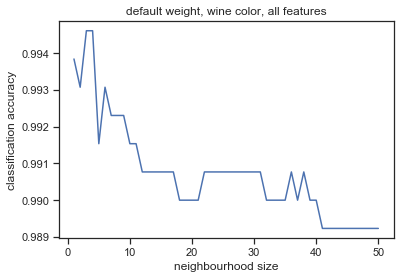

In [5]:
n_neighborslist = list(range(1,51))  # defining a range for KNN's neighborslist              
col_names=['uniform']                # Giving column names to uniform
accarray = np.zeros((len(n_neighborslist),1))    # creating a array with all the components being zero

# Converting the array to the DataFrame
acc=pd.DataFrame(accarray, columns=col_names)

max_index = 0
# Applying KNN with diferent number of neighbors
for k in n_neighborslist:
    neigh = neighbors.KNeighborsClassifier(n_neighbors=k, weights=col_names[0])
    neigh.fit(X_train_c, y_train_c)
    y_pred = neigh.predict(X_test_c)
    accscore = accuracy_score(y_test_c, y_pred)    
    acc.at[k,col_names[0]] = accscore

# Printing the mean accuracy of the combination
mean_acuracy = acc.mean()
mean_acuracy = round(float(mean_acuracy),6)
print('Average accuracy of the combination: ',mean_acuracy)
# Printing the maximum value of the accuracy of the combination
max_val = acc.max()
max_val = round(float(max_val),6)
print('maximum accuracy of the combination: ',max_val)
# Plotting the number of neighbors for which we got the maximum accuracy
max_index = acc.idxmax()
max_index = int(max_index)
print('number of neighbors for maximum accuracy: ',max_index)

# plotting the graph
plt.plot(acc[1:])
plt.xlabel("neighbourhood size")
plt.ylabel("classification accuracy")
plt.title("default weight, wine color, all features")  # giving title to the graph

- distance based weight with manhattan distance, wine color, all features

Average accuracy of the combination:  0.975852
maximum accuracy of the combination:  0.996923
number of neighbors for maximum accuracy:  23


Text(0.5, 1.0, 'distance based weight with manhattan distance, wine color, all features')

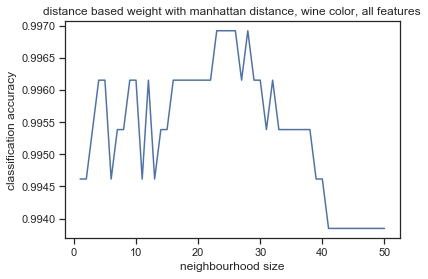

In [6]:
n_neighborslist = list(range(1,51))  # defining a range for KNN's neighborslist              
col_names=['uniform']                # Giving column names to uniform
accarray = np.zeros((len(n_neighborslist),1))    # creating a array with all the components being zero

# Converting the array to the DataFrame
acc=pd.DataFrame(accarray, columns=col_names)

max_index = 0
# Applying KNN with diferent number of neighbors
for k in n_neighborslist:
    neigh = neighbors.KNeighborsClassifier(n_neighbors=k, weights='distance',metric='manhattan')
    neigh.fit(X_train_c, y_train_c)
    y_pred = neigh.predict(X_test_c)
    accscore = accuracy_score(y_test_c, y_pred)    ## accscore = neigh.score(X_test,y_test)
    acc.at[k,col_names[0]] = accscore

# Printing the mean accuracy of the combination
mean_acuracy = acc.mean()
mean_acuracy = round(float(mean_acuracy),6)
print('Average accuracy of the combination: ',mean_acuracy)
# Printing the maximum value of the accuracy of the combination
max_val = acc.max()
max_val = round(float(max_val),6)
print('maximum accuracy of the combination: ',max_val)
# Plotting the number of neighbors for which we got the maximum accuracy
max_index = acc.idxmax()
max_index = int(max_index)
print('number of neighbors for maximum accuracy: ',max_index)

# plotting the graph
plt.plot(acc[1:])
plt.xlabel("neighbourhood size")
plt.ylabel("classification accuracy")
plt.title("distance based weight with manhattan distance, wine color, all features")  # giving title to the graph

- distance based weight with euclidean distance, wine color, all features

Average accuracy of the combination:  0.972428
maximum accuracy of the combination:  0.995385
number of neighbors for maximum accuracy:  3


Text(0.5, 1.0, 'distance based weight with euclidean distance, wine color, all features')

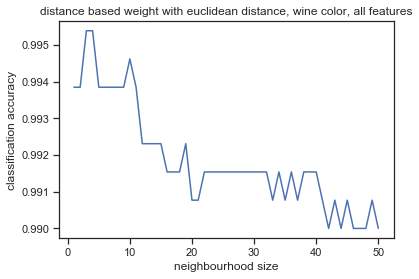

In [7]:
n_neighborslist = list(range(1,51))  # defining a range for KNN's neighborslist              
col_names=['uniform']                # Giving column names to uniform
accarray = np.zeros((len(n_neighborslist),1))    # creating a array with all the components being zero

# Converting the array to the DataFrame
acc=pd.DataFrame(accarray, columns=col_names)

max_index = 0
# Applying KNN with diferent number of neighbors
for k in n_neighborslist:
    neigh = neighbors.KNeighborsClassifier(n_neighbors=k, weights='distance',metric='euclidean')
    neigh.fit(X_train_c, y_train_c)
    y_pred = neigh.predict(X_test_c)
    accscore = accuracy_score(y_test_c, y_pred)    ## accscore = neigh.score(X_test,y_test)
    acc.at[k,col_names[0]] = accscore
# Printing the mean accuracy of the combination
mean_acuracy = acc.mean()
mean_acuracy = round(float(mean_acuracy),6)
print('Average accuracy of the combination: ',mean_acuracy)
# Printing the maximum value of the accuracy of the combination
max_val = acc.max()
max_val = round(float(max_val),6)
print('maximum accuracy of the combination: ',max_val)
# Plotting the number of neighbors for which we got the maximum accuracy
max_index = acc.idxmax()
max_index = int(max_index)
print('number of neighbors for maximum accuracy: ',max_index)

# plotting the graph
plt.plot(acc[1:])
plt.xlabel("neighbourhood size")
plt.ylabel("classification accuracy")
plt.title("distance based weight with euclidean distance, wine color, all features")  # giving title to the graph

- Text Answer: As we can see I have plotted graphs with variaty of data point weighting schemes with color label and all the features, we can conclude that we get the best accuracy using the manhattan distance metric compared to uniform weighting or euclidean distance metric. 
    - As manhattan distance metric gives us accuracy of 99.69 % on the K value of 23. which is the highest compared to any distance metric we used above.

- BONUS QUESTION: You can try additional schemes as well to see if they work better, bonus if you can ﬁnd a scheme and setting that works better than manhattan+znorm across a wide (¿15) range of k values. 

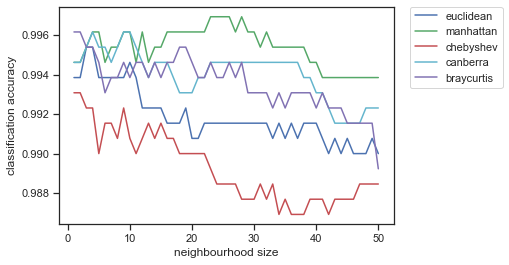

In [8]:
# defining all the distance metrics
dist_metric = ['euclidean','manhattan','chebyshev','canberra','braycurtis'] ## ,'hamming'
# bool matrix doesn't give the same accuracy its around 71%
dist_metric_bool = ['manhattan','jaccard','matching','dice','kulsinski','rogerstanimoto','russellrao','sokalmichener','sokalsneath']
# defining colors for line plot comparision between all the diferent metrics
colors = ['b','g','r','c','m','y','k']

# applying KNN on all the distance metric shown above in the neighborhood range of 1 to 15.
for i in range(len(dist_metric)):
    ## different weights, wine color, all features
    n_neighborslist = list(range(1,51))  # defining a range for KNN's neighborslist              
    col_names=['uniform']                # Giving column names to uniform
    accarray = np.zeros((len(n_neighborslist),1))    # creating a array with all the components being zero

    # Converting the array to the DataFrame
    acc=pd.DataFrame(accarray, columns=col_names)

    max_index = 0
    # Applying KNN with diferent number of neighbors
    for k in n_neighborslist:
        neigh = neighbors.KNeighborsClassifier(n_neighbors=k, weights='distance',metric=dist_metric[i])
        neigh.fit(X_train_c, y_train_c)
        y_pred = neigh.predict(X_test_c)
        accscore = accuracy_score(y_test_c, y_pred)    ## accscore = neigh.score(X_test,y_test)
        acc.at[k,col_names[0]] = accscore

    plt.plot(acc[1:],colors[i],label = dist_metric[i])
plt.xlabel("neighbourhood size")
plt.ylabel("classification accuracy")    
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

- Text Answer:After trying many different distance metrics I was unable to find a distance metric which works better than manhattan distance metric on Z-score normalized data. The closest distance metric to the manhattan disatnce metric is euclidean distance metric and braycurtis distance metric.

- Bonus Question: Feature Selection: try selecting your own subset of the data features (columns) to improve the performance. Bonus if you can ﬁnd a set of 4 that does better than all data on same metrics.

Average accuracy of the combination:  0.972157
maximum accuracy of the combination:  0.993077
number of neighbors for maximum accuracy:  5


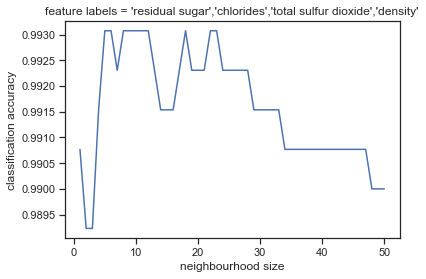

In [9]:
### Best features
D = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']
X_best_feature_train = pd.DataFrame(X_train_c,columns=D)
X_best_feature_test = pd.DataFrame(X_test_c,columns=D)
D_test1 = ['residual sugar','chlorides','total sulfur dioxide','density']
D_test2 = ['residual sugar','total sulfur dioxide','density','alcohol']
X_D_test1_train = X_best_feature_train[D_test1]
X_D_test1_test = X_best_feature_test[D_test1]

X_D_test2_train = X_best_feature_train[D_test2]
X_D_test2_test = X_best_feature_test[D_test2]

## default weight, wine color, 'residual sugar','chlorides','total sulfur dioxide','density' features
n_neighborslist = list(range(1,51))  # defining a range for KNN's neighborslist              
col_names=['uniform']                # Giving column names to uniform
accarray = np.zeros((len(n_neighborslist),1))    # creating a array with all the components being zero

# Converting the array to the DataFrame
acc=pd.DataFrame(accarray, columns=col_names)

max_index = 0

# Applying KNN with diferent number of neighbors
for k in n_neighborslist:
    neigh = neighbors.KNeighborsClassifier(n_neighbors=k, weights=col_names[0])
    neigh.fit(X_D_test1_train, y_train_c)
    y_pred = neigh.predict(X_D_test1_test)
    accscore = accuracy_score(y_test_c, y_pred)    ## accscore = neigh.score(X_test,y_test)
    acc.at[k,col_names[0]] = accscore

# Printing the mean accuracy of the combination
mean_acuracy = acc.mean()
mean_acuracy = round(float(mean_acuracy),6)
print('Average accuracy of the combination: ',mean_acuracy)
# Printing the maximum value of the accuracy of the combination
max_val = acc.max()
max_val = round(float(max_val),6)
print('maximum accuracy of the combination: ',max_val)
# Plotting the number of neighbors for which we got the maximum accuracy
max_index = acc.idxmax()
max_index = int(max_index)
print('number of neighbors for maximum accuracy: ',max_index)

# plotting the graph
plt.plot(acc[1:])
plt.xlabel("neighbourhood size")
plt.ylabel("classification accuracy")
plt.title("feature labels = 'residual sugar','chlorides','total sulfur dioxide','density'")
plt.show()

- Text Answer:After analysing the pair-plots of the data I choose the 4 features which can best classify the dataset with the color as a label. Those 4 features are 'residual sugar','chlorides','total sulfur dioxide' and 'density'. These 4 features gives us the best value of k = 5 on which we got the accuracy of 99.3%. Compared to all the features which gives us best value of k = 3 on which we got the accuracy of 99.46% .

- We can say that we found 4 set of features which gives us almost the same result compared to KNN with all the features. As we are getting the best value of k which is 5 on which we are getting the accuracy (99.31%) which is almost similar to the accuracy obtained from the all the features (99.46% with k = 3).
- we can say that these 4 features perform better because we are getting 99.46% accuracy with number of neighbors being 3 with all the features, lower number of k = 3 is more susceptible to noise, compared to higher number of k = 5 obtained by our selected features. Plus higher number of k gives us the model which is more generalized and simpler which decreases the chances of overfitting.
    - That's why we can say that the 4 selected features 'residual sugar','chlorides','total sulfur dioxide' and 'density' are performing better than all the features combined.

### Feature Extraction:

- default weight, wine color and with first 5 PC of the PCA

Average accuracy of the combination:  0.485762
maximum accuracy of the combination:  0.519231
number of neighbors for maximum accuracy:  2


Text(0.5, 1.0, 'default weight, wine color and with first 5 PC of the PCA')

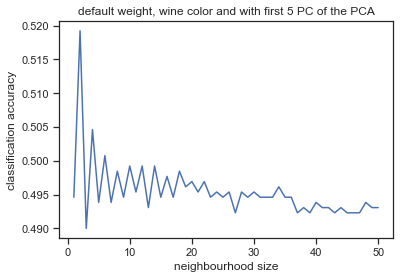

In [10]:
from sklearn.decomposition import PCA # importing library of PCA

PCA_c = PCA(n_components=5,random_state=42)# defining number of components and random state
X_train_c_PCA = PCA_c.fit_transform(X_train_c) # doing fit_transform on train dataset
X_test_c_PCA = PCA_c.fit_transform(X_test_c)# doing fit_transform on test dataset

n_neighborslist = list(range(1,51))  # defining a range for KNN's neighborslist              
col_names=['uniform']                # Giving column names to uniform
accarray = np.zeros((len(n_neighborslist),1))    # creating a array with all the components being zero

# Converting the array to the DataFrame
acc=pd.DataFrame(accarray, columns=col_names)

max_index = 0
# Applying KNN with diferent number of neighbors
for k in n_neighborslist:
    neigh = neighbors.KNeighborsClassifier(n_neighbors=k, weights=col_names[0])
    neigh.fit(X_train_c_PCA, y_train_c)
    y_pred = neigh.predict(X_test_c_PCA)
    accscore = accuracy_score(y_test_c, y_pred)    ## accscore = neigh.score(X_test,y_test)
    acc.at[k,col_names[0]] = accscore

# Printing the mean accuracy of the combination
mean_acuracy = acc.mean()
mean_acuracy = round(float(mean_acuracy),6)
print('Average accuracy of the combination: ',mean_acuracy)
# Printing the maximum value of the accuracy of the combination
max_val = acc.max()
max_val = round(float(max_val),6)
print('maximum accuracy of the combination: ',max_val)
# Plotting the number of neighbors for which we got the maximum accuracy
max_index = acc.idxmax()
max_index = int(max_index)
print('number of neighbors for maximum accuracy: ',max_index)

# plotting the graph
plt.plot(acc[1:])
plt.xlabel("neighbourhood size")
plt.ylabel("classification accuracy")
plt.title("default weight, wine color and with first 5 PC of the PCA")  # giving title to the graph

- distance based weight with manhattan distance, wine color and first 5 PC of the PCA

Average accuracy of the combination:  0.485339
maximum accuracy of the combination:  0.500769
number of neighbors for maximum accuracy:  6


Text(0.5, 1.0, 'distance based weight with manhattan distance, wine color and first 5 PC of the PCA')

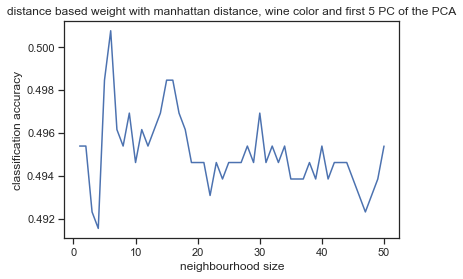

In [11]:
from sklearn.decomposition import PCA # importing library of PCA

PCA_c = PCA(n_components=5,random_state=42)# defining number of components and random state
X_train_c_PCA = PCA_c.fit_transform(X_train_c) # doing fit_transform on train dataset
X_test_c_PCA = PCA_c.fit_transform(X_test_c)# doing fit_transform on test dataset

n_neighborslist = list(range(1,51))  # defining a range for KNN's neighborslist              
col_names=['uniform']                # Giving column names to uniform
accarray = np.zeros((len(n_neighborslist),1))    # creating a array with all the components being zero

# Converting the array to the DataFrame
acc=pd.DataFrame(accarray, columns=col_names)

max_index = 0
# Applying KNN with diferent number of neighbors
for k in n_neighborslist:
    neigh = neighbors.KNeighborsClassifier(n_neighbors=k, weights='distance',metric='manhattan')
    neigh.fit(X_train_c_PCA, y_train_c)
    y_pred = neigh.predict(X_test_c_PCA)
    accscore = accuracy_score(y_test_c, y_pred)    ## accscore = neigh.score(X_test,y_test)
    acc.at[k,col_names[0]] = accscore
# Printing the mean accuracy of the combination
mean_acuracy = acc.mean()
mean_acuracy = round(float(mean_acuracy),6)
print('Average accuracy of the combination: ',mean_acuracy)
# Printing the maximum value of the accuracy of the combination
max_val = acc.max()
max_val = round(float(max_val),6)
print('maximum accuracy of the combination: ',max_val)
# Plotting the number of neighbors for which we got the maximum accuracy
max_index = acc.idxmax()
max_index = int(max_index)
print('number of neighbors for maximum accuracy: ',max_index)

# plotting the graph
plt.plot(acc[1:])
plt.xlabel("neighbourhood size")
plt.ylabel("classification accuracy")
plt.title("distance based weight with manhattan distance, wine color and first 5 PC of the PCA")  # giving title to the graph

- distance based weight with euclidean distance, wine color and first 5 PC of the PCA

Average accuracy of the combination:  0.484268
maximum accuracy of the combination:  0.496154
number of neighbors for maximum accuracy:  12


Text(0.5, 1.0, 'distance based weight with euclidean distance, wine color and first 5 PC of the PCA')

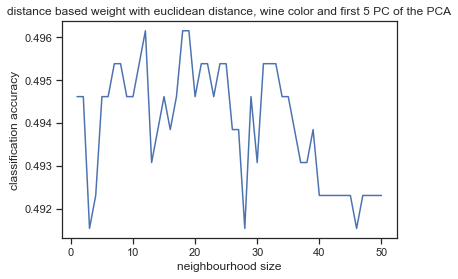

In [12]:
from sklearn.decomposition import PCA # importing library of PCA

PCA_c = PCA(n_components=5,random_state=42)# defining number of components and random state
X_train_c_PCA = PCA_c.fit_transform(X_train_c) # doing fit_transform on train dataset
X_test_c_PCA = PCA_c.fit_transform(X_test_c)# doing fit_transform on test dataset

n_neighborslist = list(range(1,51))  # defining a range for KNN's neighborslist              
col_names=['uniform']                # Giving column names to uniform
accarray = np.zeros((len(n_neighborslist),1))    # creating a array with all the components being zero

# Converting the array to the DataFrame
acc=pd.DataFrame(accarray, columns=col_names)

max_index = 0
# Applying KNN with diferent number of neighbors
for k in n_neighborslist:
    neigh = neighbors.KNeighborsClassifier(n_neighbors=k, weights='distance',metric='euclidean')
    neigh.fit(X_train_c_PCA, y_train_c)
    y_pred = neigh.predict(X_test_c_PCA)
    accscore = accuracy_score(y_test_c, y_pred)    ## accscore = neigh.score(X_test,y_test)
    acc.at[k,col_names[0]] = accscore
# Printing the mean accuracy of the combination
mean_acuracy = acc.mean()
mean_acuracy = round(float(mean_acuracy),6)
print('Average accuracy of the combination: ',mean_acuracy)
# Printing the maximum value of the accuracy of the combination
max_val = acc.max()
max_val = round(float(max_val),6)
print('maximum accuracy of the combination: ',max_val)
# Plotting the number of neighbors for which we got the maximum accuracy
max_index = acc.idxmax()
max_index = int(max_index)
print('number of neighbors for maximum accuracy: ',max_index)

# plotting the graph
plt.plot(acc[1:])
plt.xlabel("neighbourhood size")
plt.ylabel("classification accuracy")
plt.title("distance based weight with euclidean distance, wine color and first 5 PC of the PCA")  # giving title to the graph

- default weight, wine color and LDA

Average accuracy of the combination:  0.974842
maximum accuracy of the combination:  0.994615
number of neighbors for maximum accuracy:  5


Text(0.5, 1.0, 'default weight, wine color and LDA')

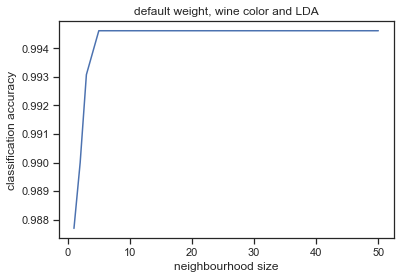

In [13]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA # importing library of LDA

LDA_c = LDA()  # initializing LDA
X_train_c_LDA = LDA_c.fit_transform(X_train_c,y_train_c) # applying LDA on the training dataset
X_test_c_LDA = LDA_c.fit_transform(X_test_c,y_test_c) # applying LDA on the testing dataset

n_neighborslist = list(range(1,51))  # defining a range for KNN's neighborslist              
col_names=['uniform']                # Giving column names to uniform
accarray = np.zeros((len(n_neighborslist),1))    # creating a array with all the components being zero

# Converting the array to the DataFrame
acc=pd.DataFrame(accarray, columns=col_names)

max_index = 0
# Applying KNN with diferent number of neighbors
for k in n_neighborslist:
    neigh = neighbors.KNeighborsClassifier(n_neighbors=k, weights=col_names[0])
    neigh.fit(X_train_c_LDA, y_train_c)
    y_pred = neigh.predict(X_test_c_LDA)
    accscore = accuracy_score(y_test_c, y_pred)    ## accscore = neigh.score(X_test,y_test)
    acc.at[k,col_names[0]] = accscore
# Printing the mean accuracy of the combination
mean_acuracy = acc.mean()
mean_acuracy = round(float(mean_acuracy),6)
print('Average accuracy of the combination: ',mean_acuracy)
# Printing the maximum value of the accuracy of the combination
max_val = acc.max()
max_val = round(float(max_val),6)
print('maximum accuracy of the combination: ',max_val)
# Plotting the number of neighbors for which we got the maximum accuracy
max_index = acc.idxmax()
max_index = int(max_index)
print('number of neighbors for maximum accuracy: ',max_index)

# plotting the graph
plt.plot(acc[1:])
plt.xlabel("neighbourhood size")
plt.ylabel("classification accuracy")
plt.title("default weight, wine color and LDA")  # giving title to the graph

- distance based weight manhattan distance, wine color and LDA

Average accuracy of the combination:  0.973756
maximum accuracy of the combination:  0.994615
number of neighbors for maximum accuracy:  36


Text(0.5, 1.0, 'distance based weight manhattan distance, wine color and LDA')

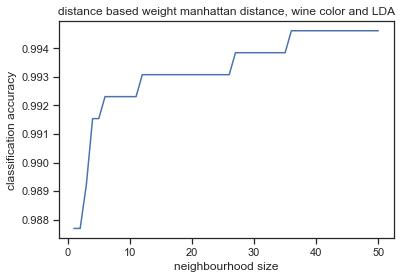

In [14]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA # importing library of LDA

LDA_c = LDA()  # initializing LDA
X_train_c_LDA = LDA_c.fit_transform(X_train_c,y_train_c) # applying LDA on the training dataset
X_test_c_LDA = LDA_c.fit_transform(X_test_c,y_test_c) # applying LDA on the testing dataset

n_neighborslist = list(range(1,51))  # defining a range for KNN's neighborslist              
col_names=['uniform']                # Giving column names to uniform
accarray = np.zeros((len(n_neighborslist),1))    # creating a array with all the components being zero

# Converting the array to the DataFrame
acc=pd.DataFrame(accarray, columns=col_names)

max_index = 0
# Applying KNN with diferent number of neighbors
for k in n_neighborslist:
    neigh = neighbors.KNeighborsClassifier(n_neighbors=k, weights='distance',metric='manhattan')
    neigh.fit(X_train_c_LDA, y_train_c)
    y_pred = neigh.predict(X_test_c_LDA)
    accscore = accuracy_score(y_test_c, y_pred)    ## accscore = neigh.score(X_test,y_test)
    acc.at[k,col_names[0]] = accscore
# Printing the mean accuracy of the combination
mean_acuracy = acc.mean()
mean_acuracy = round(float(mean_acuracy),6)
print('Average accuracy of the combination: ',mean_acuracy)
# Printing the maximum value of the accuracy of the combination
max_val = acc.max()
max_val = round(float(max_val),6)
print('maximum accuracy of the combination: ',max_val)
# Plotting the number of neighbors for which we got the maximum accuracy
max_index = acc.idxmax()
max_index = int(max_index)
print('number of neighbors for maximum accuracy: ',max_index)

# plotting the graph
plt.plot(acc[1:])
plt.xlabel("neighbourhood size")
plt.ylabel("classification accuracy")
plt.title("distance based weight manhattan distance, wine color and LDA")  # giving title to the graph

- distance based weight euclidean distance, wine color and LDA

Average accuracy of the combination:  0.973756
maximum accuracy of the combination:  0.994615
number of neighbors for maximum accuracy:  36


Text(0.5, 1.0, 'distance based weight euclidean distance, wine color and LDA')

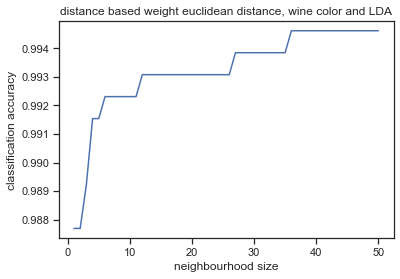

In [15]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA # importing library of LDA

LDA_c = LDA()  # initializing LDA
X_train_c_LDA = LDA_c.fit_transform(X_train_c,y_train_c) # applying LDA on the training dataset
X_test_c_LDA = LDA_c.fit_transform(X_test_c,y_test_c) # applying LDA on the testing dataset

n_neighborslist = list(range(1,51))  # defining a range for KNN's neighborslist              
col_names=['uniform']                # Giving column names to uniform
accarray = np.zeros((len(n_neighborslist),1))    # creating a array with all the components being zero

# Converting the array to the DataFrame
acc=pd.DataFrame(accarray, columns=col_names)

max_index = 0
# Applying KNN with diferent number of neighbors
for k in n_neighborslist:
    neigh = neighbors.KNeighborsClassifier(n_neighbors=k, weights='distance',metric='euclidean')
    neigh.fit(X_train_c_LDA, y_train_c)
    y_pred = neigh.predict(X_test_c_LDA)
    accscore = accuracy_score(y_test_c, y_pred)    ## accscore = neigh.score(X_test,y_test)
    acc.at[k,col_names[0]] = accscore
# Printing the mean accuracy of the combination
mean_acuracy = acc.mean()
mean_acuracy = round(float(mean_acuracy),6)
print('Average accuracy of the combination: ',mean_acuracy)
# Printing the maximum value of the accuracy of the combination
max_val = acc.max()
max_val = round(float(max_val),6)
print('maximum accuracy of the combination: ',max_val)
# Plotting the number of neighbors for which we got the maximum accuracy
max_index = acc.idxmax()
max_index = int(max_index)
print('number of neighbors for maximum accuracy: ',max_index)

# plotting the graph
plt.plot(acc[1:])
plt.xlabel("neighbourhood size")
plt.ylabel("classification accuracy")
plt.title("distance based weight euclidean distance, wine color and LDA")  # giving title to the graph

- Text Answer: After applying feature extraction method of PCA and LDA, I applied the same weighting schemes on to the extracted features. Analysis of the same is as given below. In here too for ease of understanding I have only plotted the accuracy graph for the Color label.

- When we applied PCA with number of components = 5, we are getting really low accuracy for all the weighting schemes. 
    - For uniform weighting scheme with PCA of 5 components we are getting best accuracy of 51.1% with k = 2, and the accuracy for manhattan and euclidean distance metric are (50.07% for k = 6 and 49.61% with k = 14). Compared to all the features which gives us accuracy of 99.46% at k = 3.
    - So, we can conclude that the PCA performs poorly with this dataset, as it's giving us half the accuracy of the all the features, even the 4 selected features ('residual sugar','chlorides','total sulfur dioxide' and 'density') performs better than 5 extrated features of PCA.
- When we did the analysis using the LDA, we got results which are similar to the analysis done with all the features.
    - With LDA I got accuracy of 99.46% for all the weighting schemes. only the number of neighbors on which we got the highest accuracy changes for each weighting scheme. For example, for uniform weighting scheme, manhattan distance metric and euclidean distance metric I got 99.46% accuracy at k = 5,36 and 36 respectively.
    - As we know lower the number of K the model is complex and there is more chance for overfitting.
    - If we have high value of K then our model is simpler and smooth and less prone to the noise. But, more chances of underfitting. 
    
- So, we can conclude that LDA performs better than PCA by a huge 50% accuracy. Because PCA is unsupervised algorithm and LDA is supervised algorithm.

### Analysis and Discussion: 

- k Plots: All the possible K plots with combination of weighting scheme, label (wine colour, wine quality), and feature subset (all features, your subset, ﬁrst 5 principle components, LDA components) is plotted above with the computation of the same.
After plotting and analysing all of them we can conclude that,
    - In the KNN of all the features and different weighting schemes, we can conclude that manhattan distance metric works the best as it gives us the best accuracy of 99.69% at K = 23. And on average all the feature with any weighting scheme provides us with more than 99.46 % of accuracy which is the best compared to PCA, LDA.
    - In the selected features 'residual sugar','chlorides','total sulfur dioxide' and 'density', we get accuracy of 99.3% with k = 5, it performs almost as well as the KNN with all the components.
    - In the KNN of first 5 principle components, we can conclude that uniform weighting scheme is the best as it provides 51.9% accuracy and for manhattan and euclidean distance metric the accuracy goes on decreasing from 50.07% to 49.6% respectively. So,  the performance of PCA is the worst as it gives acuracy which is less than 50 % the one with KNN and the one with selected features.
    - In the KNN of the LDA, we can get the same accuracy of 99.46% for all the weighting schemes, just the number of neighbors chages for each weighing scheme.
    - So, over all we can say that for the best accuracy we should perform KNN with all the features and use manhattan distance metric.

- Features: After looking at the pair-plot and analysing the same we can conclude several things which are discussed below.
    - There are several features which works better compared to other features for classification of wine model. If we analyze the histograms and scatter plots of 11 features from the pair plots, we can clearly see that there are some histograms of features which classifies colors of wine really well, and there are some scatter plots between the features which classifies for the wine color well. For example, 'volatile acidity', 'residual sugar', 'chlorides', 'total sulfur dioxide' and 'density'. And we can also see that there are histograms of features which are completely overlapped means these features doesn't perform well for classification for example 'alcohol', 'sulphates', 'pH', 'free sulfur dioxide' and 'fixed acidity'.

- Selected Features: I was not able to find a subset that worked better then all the features, but I was able to find subset of 4 features that worked almost the same compared to KNN with all the features. The subset of 4 feature is 'residual sugar','chlorides','total sulfur dioxide' and 'density'. 
    - This subset of feature worked better than the PCA's 5 principle components.
    - This subset didn't work better than the LDA but came very close.

- PCA vs. LDA: If we compare PCA with LDA we can clearly conclude that the LDA outperforms PCA by a huge margin of 50 percentage. The reason behind this explained below.
    - PCA is un-supervised learning algorithm as it ignores the class label, and it tries to perform feature extraction based on the maximum variance. We can obtain quality of the wine or color of the wine by selecting different features. But, there are features which are dummy features (Features can be derived from other features). In short we can better predict the type of wine or quality of the wine by doing simple feature selection rather than PCA.
    - And we can see the same thing happening here, as 4 selected features ('residual sugar','chlorides','total sulfur dioxide' and 'density') outperforms PCA by almost 50% accuracy.
    - LDA is a supervised laerning algorithm as it uses class labels to perform feature extraction. It is better way to perform feature extraction, as it prreserves as much as class discriminant information as possible. 
    - LDA helps us to find the boundaries around the clusters of classes and after that it finds centroid of each class cluster. LDA has two goals, first is to maximize distance between the centroids of two class and the second on is to minimize the variation within each category. 
    - Due to above method of feature extraction we can clearly see that LDA outperforms PCA by 50%. So, for classification purposes between different classes  we should chose LDA over PCA for better accracy.

- Plot: 

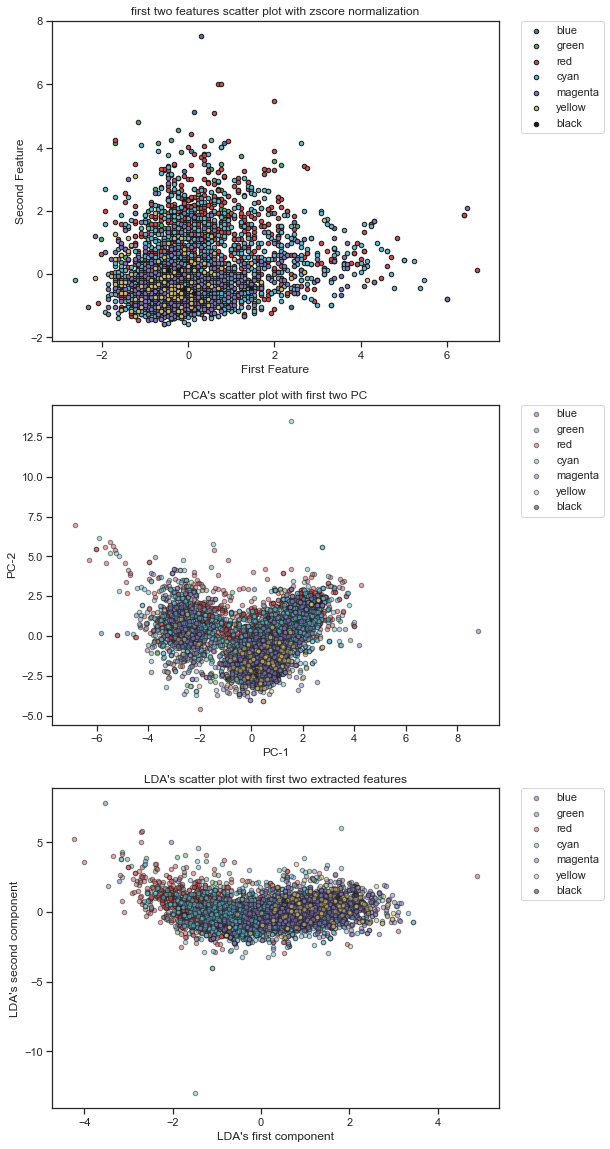

In [16]:
### plotting subplots of the normalized , PCA and LDA data
scatter_subplot = plt.figure(figsize=(8,20))  # defining sub-plot 
all_features_subplot = scatter_subplot.add_subplot(3,1,1) # first sub-plot will contain all the features
PCA_subplot = scatter_subplot.add_subplot(3,1,2) # second sub-plot will contain PCA's Principle Components
LDA_sublot = scatter_subplot.add_subplot(3,1,3) # Third sub-plot will contain LDA's extrated components

# defining colors
b = y_train_l == 3
g = y_train_l == 4
r = y_train_l == 5
c = y_train_l == 6
m = y_train_l == 7
y = y_train_l == 8
k = y_train_l == 9

# plotting scatter plot of all the features with label being quality
all_features_subplot.scatter(X_train_l[b,0], X_train_l[b,1],c = "b",s=20,edgecolor = 'k',label = "blue")
all_features_subplot.scatter(X_train_l[g,0], X_train_l[g,1],c = "g",s=20,edgecolor = 'k',label = "green")
all_features_subplot.scatter(X_train_l[r,0], X_train_l[r,1],c = "r",s=20,edgecolor = 'k',label = "red")
all_features_subplot.scatter(X_train_l[c,0], X_train_l[c,1],c = "c",s=20,edgecolor = 'k',label = "cyan")
all_features_subplot.scatter(X_train_l[m,0], X_train_l[m,1],c = "m",s=20,edgecolor = 'k',label = "magenta")
all_features_subplot.scatter(X_train_l[y,0], X_train_l[y,1],c = "y",s=20,edgecolor = 'k',label = "yellow")
all_features_subplot.scatter(X_train_l[k,0], X_train_l[k,1],c = "k",s=20,edgecolor = 'k',label = "black")
all_features_subplot.set_xlabel("First Feature")
all_features_subplot.set_ylabel("Second Feature")
all_features_subplot.set_title("first two features scatter plot with zscore normalization")
all_features_subplot.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

# applying PCA and plotting the same
from sklearn.decomposition import PCA

pca_scatter = PCA(n_components=6)
X_train_PCA_l_scatter = pca_scatter.fit_transform(X_train_l) # applying PCA and applying the same

# plotting scatter plot of PCA with label being quality
PCA_subplot.scatter(X_train_PCA_l_scatter[b,0], X_train_PCA_l_scatter[b,1],c = "b",s=20,edgecolor = 'k',alpha = 0.5,label = "blue")
PCA_subplot.scatter(X_train_PCA_l_scatter[g,0], X_train_PCA_l_scatter[g,1],c = "g",s=20,edgecolor = 'k',alpha = 0.5,label = "green")
PCA_subplot.scatter(X_train_PCA_l_scatter[r,0], X_train_PCA_l_scatter[r,1],c = "r",s=20,edgecolor = 'k',alpha = 0.5,label = "red")
PCA_subplot.scatter(X_train_PCA_l_scatter[c,0], X_train_PCA_l_scatter[c,1],c = "c",s=20,edgecolor = 'k',alpha = 0.5,label = "cyan")
PCA_subplot.scatter(X_train_PCA_l_scatter[m,0], X_train_PCA_l_scatter[m,1],c = "m",s=20,edgecolor = 'k',alpha = 0.5,label = "magenta")
PCA_subplot.scatter(X_train_PCA_l_scatter[y,0], X_train_PCA_l_scatter[y,1],c = "y",s=20,edgecolor = 'k',alpha = 0.5,label = "yellow")
PCA_subplot.scatter(X_train_PCA_l_scatter[k,0], X_train_PCA_l_scatter[k,1],c = "k",s=20,edgecolor = 'k',alpha = 0.5,label = "black")
PCA_subplot.set_xlabel("PC-1")
PCA_subplot.set_ylabel("PC-2")
PCA_subplot.set_title("PCA's scatter plot with first two PC")
PCA_subplot.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

# applying LDA and plotting the same
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

LDA_scatter = LDA(n_components=5)
X_train_LDA_l_scatter = LDA_scatter.fit_transform(X_train_l,y_train_l)

# plotting scatter plot of LDA with label being quality
LDA_sublot.scatter(X_train_LDA_l_scatter[b,0], X_train_LDA_l_scatter[b,1],c = "b",s=20,edgecolor = 'k',alpha = 0.5,label = "blue")
LDA_sublot.scatter(X_train_LDA_l_scatter[g,0], X_train_LDA_l_scatter[g,1],c = "g",s=20,edgecolor = 'k',alpha = 0.5,label = "green")
LDA_sublot.scatter(X_train_LDA_l_scatter[r,0], X_train_LDA_l_scatter[r,1],c = "r",s=20,edgecolor = 'k',alpha = 0.5,label = "red")
LDA_sublot.scatter(X_train_LDA_l_scatter[c,0], X_train_LDA_l_scatter[c,1],c = "c",s=20,edgecolor = 'k',alpha = 0.5,label = "cyan")
LDA_sublot.scatter(X_train_LDA_l_scatter[m,0], X_train_LDA_l_scatter[m,1],c = "m",s=20,edgecolor = 'k',alpha = 0.5,label = "magenta")
LDA_sublot.scatter(X_train_LDA_l_scatter[y,0], X_train_LDA_l_scatter[y,1],c = "y",s=20,edgecolor = 'k',alpha = 0.5,label = "yellow")
LDA_sublot.scatter(X_train_LDA_l_scatter[k,0], X_train_LDA_l_scatter[k,1],c = "k",s=20,edgecolor = 'k',alpha = 0.5,label = "black")
LDA_sublot.set_xlabel("LDA's first component")
LDA_sublot.set_ylabel("LDA's second component")
LDA_sublot.set_title("LDA's scatter plot with first two extracted features")
LDA_sublot.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

- From the above plot of the scatter plot of the original dataset, PCA and LDA we can conclude that,
    - PCA performs very very poorly as it's unsupervised algorithm which doesn't take the target value as input, and it only tried to extract features which provides the maximum variance. It doesn't care if those extracted features seperate the classes or not.
    - On the other hand we can say that LDA didn't do that well as we can't classify the dataset based on first two components of LDA. Overall LDA performs better compared to PCA which is also seen in the KNN's accuracy plot plotted in the above section.

# Linear Dimensionality Reduction

## Dataset:

In [17]:
# Importing important libraries
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA, KernelPCA
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
plt.style.use('default')

# reading data 
data = pd.read_csv("DataB.csv")
print(data.shape)
scaler = StandardScaler()
# creating a feature dataset
X = data.drop('gnd',axis=1)
# creating a label dataset
y = data['gnd']
X = X.drop('Unnamed: 0',axis=1)
# applying standard scaler transform on the dataset
X = scaler.fit_transform(X)

(2066, 786)


## Principal Component Analysis (PCA)

### Practical Questions

- (1) 

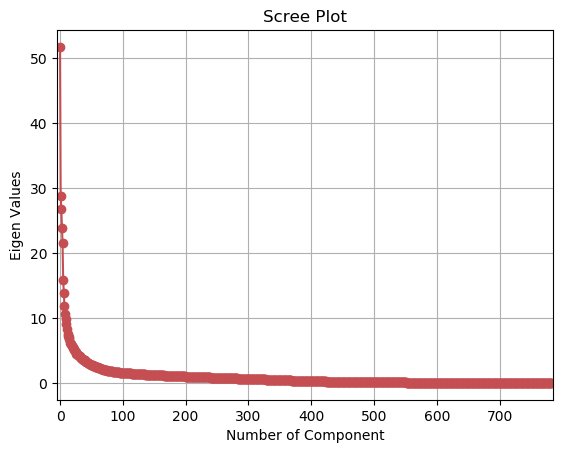

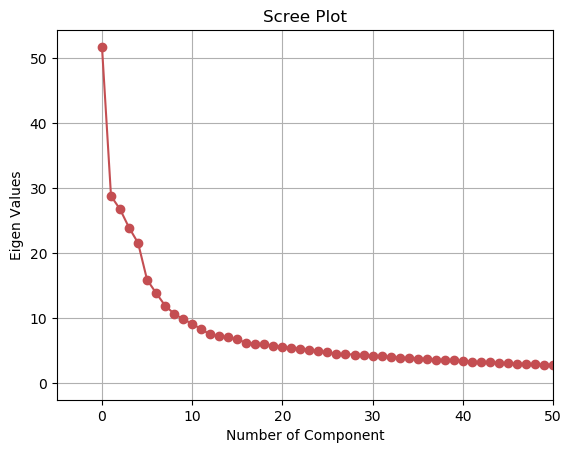

In [18]:
# finding covaraince matrix from the feature dataset
Cov_Mat = np.cov(X.T) # for this we need rows representing variable and column represents single observation

# now to get the eigen values and eigen vectors
eig_val, eig_vec = np.linalg.eigh(Cov_Mat) ### convert it to "eigh"
eig_val = np.flip(eig_val)
eig_vec = np.flip(eig_vec,axis = 1)

features = []
for i in range(len(Cov_Mat)):
    features.append(i)

# plotting the scree plot - eigen values vs number of features.
plt.figure()
plt.plot(features,eig_val,'ro-')
#plt.bar(features,eig_val)
plt.grid()
plt.xlim(-5,785)
plt.title('Scree Plot')
plt.xlabel('Number of Component')
plt.ylabel('Eigen Values')
plt.show()

# plotting the scree plot with differnt range
plt.figure()
plt.plot(features,eig_val,'ro-')
#plt.bar(features,eig_val)
plt.grid()
plt.xlim(-5,50)
plt.title('Scree Plot')
plt.xlabel('Number of Component')
plt.ylabel('Eigen Values')
plt.show()

- Scree plot is as shown in the above graph. But, the analysis of the above graph is difficult as we can't clearly comprehand that after which number of eigen value our rate of change of slope is almost the same.
    - To understand the graph better let's plot the same graph with different range (0 to 50) in number of eigenvalue. So, now we can clearly comprehand from the scree plot that we are getting large rate of change in the slope for the eigen values number 0 to 10. But, after 10th eigen value the rate of change of the slope very slow.
    - So, we can conclude that we get the maximum information from first 10 eigen values and respective principal components compared to other eigen values. 
    - So, the cut-off with 10 eigen values is good. As those components corresponds to the top 10 eigen values will have the maximum variance/ Information retention, compared to other components and their corresponding eigen values.

- (2)

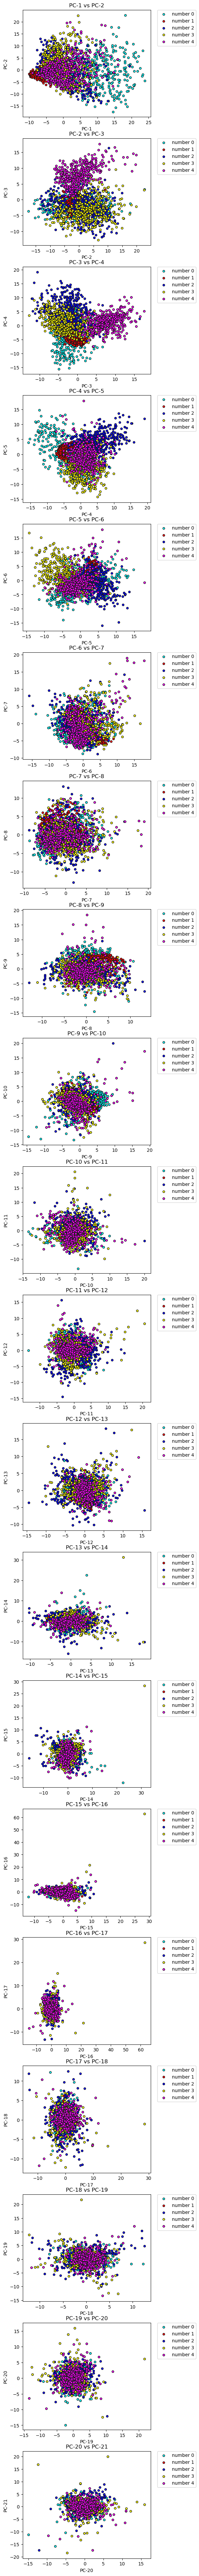

In [19]:
# Apply PCA algorithm
pca = PCA(n_components=21,random_state = 42)  # defining PCA with random_state = 42 and n_components = 21
PCA_out = pca.fit_transform(X)  # getting the PCA transformed dataset
#print(PCA_out.shape)            # printing the shape of the dataset
#print(PCA_out[:,0:2])           # printing the first two principal components of the PCA 

# plotting subplots
cyan = y == 0
red = y == 1
blue = y == 2
yellow = y == 3
magenta = y == 4

f = plt.figure(figsize=(5,100))
for i in range(0,20):
    ai = f.add_subplot(20,1,i+1)
    ai.scatter(PCA_out[cyan,i], PCA_out[cyan,i+1],c = "cyan",s=20,edgecolor = 'k',label = "number 0")
    ai.scatter(PCA_out[red,i], PCA_out[red,i+1],c = "red",s=20,edgecolor = 'k',label = "number 1")
    ai.scatter(PCA_out[blue,i], PCA_out[blue,i+1],c = "blue",s=20,edgecolor = 'k',label = "number 2")
    ai.scatter(PCA_out[yellow,i], PCA_out[yellow,i+1],c = "yellow",s=20,edgecolor = 'k',label = "number 3")
    ai.scatter(PCA_out[magenta,i], PCA_out[magenta,i+1],c = "magenta",s=20,edgecolor = 'k',label = "number 4")
    xlab = i+1
    ylab = i+2
    ai.set_xlabel("PC-%d"%xlab)
    ai.set_ylabel("PC-%d"%ylab)
    ai.set_title("PC-%d vs PC-%d"%(xlab,ylab))
    ai.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

- In the above plots you can see that I have plotted scatter plots for first 20 principal components projection. And after analysing those graphs we can clearly see that,
    - For PC1 vs PC2 to PC9 to PC10 we can see different class labels clearly. And after PC9 vs PC10's scatter plot we can clearly see that our scatter plot has multiple classes overlapping with eachother. 
    - From the above analysis we can clearly confirm the analysis that we did with scatter plot. As in the scree plot we confirmed that the first 10 eigen values which corresponds to the first 10 principle component is giving us the maximum information retention. We can confirm the conclusion derived from the scree plot analysis from the scatter plot of the first 10 principle components.
    - So, in conclusion after analysing the scree plot and the scatter plot of first 10 pricipal components we can conclude that first 10 principle components corresponding to the first 10 highest eigen values has captured maximum varaince and has the maximum information gain.

- (3)

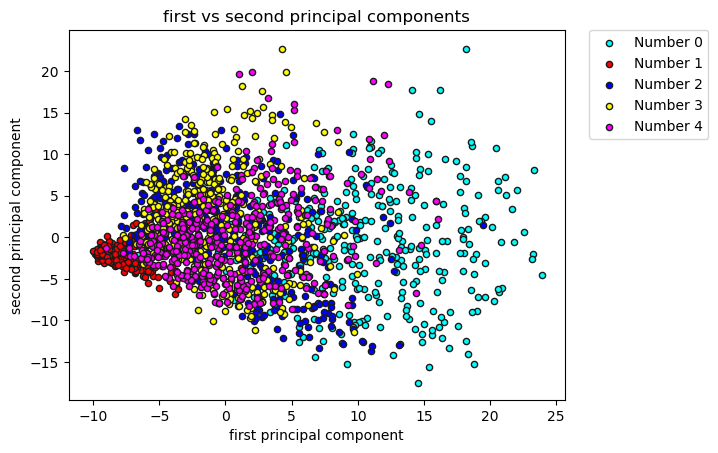

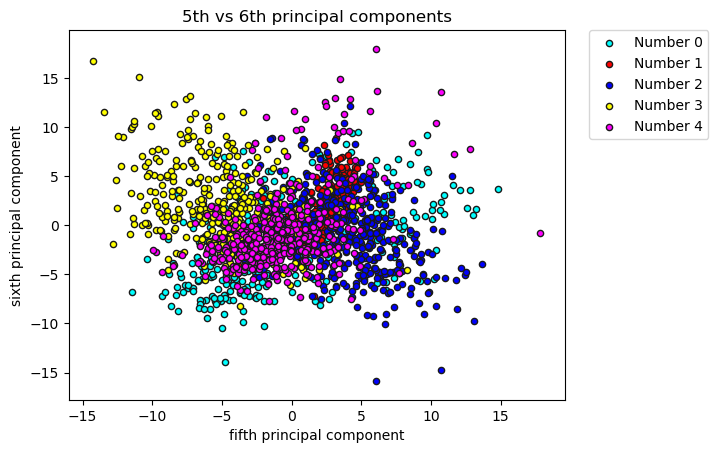

In [20]:
### Question 2.2.1's third question
# assigning different colors to different labels of the target value
cyan = y == 0
red = y == 1
blue = y == 2
yellow = y == 3
magenta = y == 4

# plotting the scatter plot for principal component 1 vs principal component 2
plt.figure()
plt.scatter(PCA_out[cyan,0], PCA_out[cyan,1],c = "cyan",s=20,edgecolor = 'k',label = "Number 0")
plt.scatter(PCA_out[red,0], PCA_out[red,1],c = "red",s=20,edgecolor = 'k',label = "Number 1")
plt.scatter(PCA_out[blue,0], PCA_out[blue,1],c = "blue",s=20,edgecolor = 'k',label = "Number 2")
plt.scatter(PCA_out[yellow,0], PCA_out[yellow,1],c = "yellow",s=20,edgecolor = 'k',label = "Number 3")
plt.scatter(PCA_out[magenta,0], PCA_out[magenta,1],c = "magenta",s=20,edgecolor = 'k',label = "Number 4")
plt.title("first vs second principal components")
plt.xlabel("first principal component")
plt.ylabel("second principal component")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

# plotting the scatter plot for principal component 5 vs principal component 6
plt.figure()
plt.scatter(PCA_out[cyan,4], PCA_out[cyan,5],c = "cyan",s=20,edgecolor = 'k',label = "Number 0")
plt.scatter(PCA_out[red,4], PCA_out[red,5],c = "red",s=20,edgecolor = 'k',label = "Number 1")
plt.scatter(PCA_out[blue,4], PCA_out[blue,5],c = "blue",s=20,edgecolor = 'k',label = "Number 2")
plt.scatter(PCA_out[yellow,4], PCA_out[yellow,5],c = "yellow",s=20,edgecolor = 'k',label = "Number 3")
plt.scatter(PCA_out[magenta,4], PCA_out[magenta,5],c = "magenta",s=20,edgecolor = 'k',label = "Number 4")
plt.title("5th vs 6th principal components")
plt.xlabel("fifth principal component")
plt.ylabel("sixth principal component")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

- I have plotted the scatter plot of first and second principal components & fifth and sixth principal components. Let's analyse both in detail below.
    - From analysing scatter plot of the first and second principle components. We can say that they are not that much over lapping (if we compare it to the principal component 5 vs 6). From the scatter plot of the first and second principal component we can see that the samples of class label 0 and 1 are somewhat not overlapped by samples of other classes.
    - But in the scatter plot of principal component 5 and 6 we can see that almost all the class samples are overlapped with eachother. Which suggests that these principal components have less variance compared to the first and second pricipal components.
    - So, from both the scatter plots we can conclude that principal components corresponding to the biggest eigen values provide us with more variance in the calss samples. Which gives us the most information.

- (4)

In [21]:
## PCA from scrath using SVD
import time
def PCA(X,y,n_components):
    # creating centralized matrix from X
    X_mean = np.mean(X,axis=0)
    X_centralized = (X - X_mean)
    X_centralized = np.matrix(X_centralized)
    X_centralized = X_centralized.T      ### d*n matrix is X_centralized now we will solve it ali's way
    # creating left and right singular matrix from centralized matrix
    r_m = np.matmul(X_centralized.T,X_centralized)

    # creating eigen values and vectors of the right singular matrix
    r_m_val, r_m_vec = np.linalg.eigh(r_m)
    #eig_val = np.flip(r_m_val)
    r_m_vec = np.flip(r_m_vec,axis = 1)  # arranging vectors in descending order
    V = r_m_vec[:,0:n_components]
    
    # calculating processing time of the PCA algorithm
    start = time.perf_counter()
    l_m = np.matmul(X_centralized,X_centralized.T)
    # creating eigen values and vectors of the left singular matrix
    l_m_val, l_m_vec = np.linalg.eigh(l_m)
    eig_val = np.flip(l_m_val)
    l_m_vec = np.flip(l_m_vec,axis=1)  # arranging vectors in descending order
    U = l_m_vec[:,0:n_components]

    Sigma_vec = np.sqrt(eig_val)  # creating singular matrix
    Sigma_vec = np.nan_to_num(Sigma_vec)  
    Sigma_mat = np.diag(Sigma_vec)

    direct_pca_out = np.matmul(U.T,X_centralized) #  gives p*n traspose it to get the real thing
    end = time.perf_counter()
    running_time = end - start

    final_pca_out = direct_pca_out.T
    return final_pca_out,running_time

PCA_out,time_taken_PCA = PCA(X,y,784)
print("direct PCA: \n",PCA_out)
print("Time taken by direct PCA: \n",time_taken_PCA," Seconds")

direct PCA: 
 [[ 9.97069222e+00  6.18172201e+00 -4.99286326e+00 ... -2.84664097e-02
   6.97997657e-02  7.44883255e-02]
 [ 1.14159998e+01  6.94158705e+00 -5.06302886e+00 ... -2.28147473e-01
   4.55949595e-02  6.14775845e-02]
 [ 3.69011918e+00  4.69309729e+00 -2.90865640e+00 ...  1.15182625e-01
  -5.60241248e-03  3.14112641e-02]
 ...
 [-3.49421529e-01  9.33681056e-01  8.10744188e+00 ... -6.93521885e-02
  -8.49495279e-02 -1.65756817e-02]
 [-3.11526327e+00  2.09047425e+00  6.27251911e+00 ...  1.26995790e-01
   1.46191708e-02  2.07556239e-03]
 [-5.64409375e+00 -2.46166632e-01  4.14018317e+00 ...  1.57632818e-02
  -1.77113186e-02 -1.11643749e-02]]
Time taken by direct PCA: 
 3.654288699999995  Seconds


In [22]:
# dual PCA from scrath using SVD
import time
def dual_PCA(X,y,n_components):
    # doing centralization on X
    X_mean = np.mean(X,axis=0)
    X_centralized = (X - X_mean)
    X_centralized = np.matrix(X_centralized)
    X_centralized = X_centralized.T      
    # creating right and left singular matrix
    l_m = np.matmul(X_centralized,X_centralized.T)
    
    # find eigen vectors and values of left singular matrix
    l_m_val, l_m_vec = np.linalg.eigh(l_m)
    l_m_vec = np.flip(l_m_vec,axis=1)
    eig_val = np.flip(l_m_val)
    U = l_m_vec[:,0:n_components]
    
    
    # calculating processing time
    start = time.perf_counter()
    r_m = np.matmul(X_centralized.T,X_centralized)
    # find eigen vectors and values of right singular matix
    r_m_val, r_m_vec = np.linalg.eigh(r_m)
    #eig_val = np.flip(r_m_val)
    r_m_vec = np.flip(r_m_vec,axis = 1)
    V = r_m_vec[:,0:n_components]
    
    # finding sigma matrix
    Sigma_vec = np.sqrt(eig_val)
    #Sigma_vec = np.nan_to_num(Sigma_vec)  # no need to do this part nan to num 
    Sigma_vec = Sigma_vec[0:n_components]
    Sigma_mat = np.diag(Sigma_vec)

    dual_pca_out = np.matmul(Sigma_mat,V.T) #  gives p*n traspose it to get the real thing
    end = time.perf_counter()
    # final output obtained from the dual PCA using SVD
    final_dual_pca_out = dual_pca_out.T
    running_time = end - start

    return final_dual_pca_out,running_time

dual_PCA_out,time_taken_dual_PCA = dual_PCA(X,y,784)
print("Dual PCA: \n",dual_PCA_out)
print("Time taken by dual PCA: \n",time_taken_dual_PCA," Seconds")

Dual PCA: 
 [[ 9.97069222e+00 -6.18172201e+00  4.99286326e+00 ...  2.84664097e-02
  -6.97997657e-02  7.44883255e-02]
 [ 1.14159998e+01 -6.94158705e+00  5.06302886e+00 ...  2.28147473e-01
  -4.55949595e-02  6.14775845e-02]
 [ 3.69011918e+00 -4.69309729e+00  2.90865640e+00 ... -1.15182625e-01
   5.60241248e-03  3.14112641e-02]
 ...
 [-3.49421529e-01 -9.33681056e-01 -8.10744188e+00 ...  6.93521885e-02
   8.49495279e-02 -1.65756817e-02]
 [-3.11526327e+00 -2.09047425e+00 -6.27251911e+00 ... -1.26995790e-01
  -1.46191708e-02  2.07556239e-03]
 [-5.64409375e+00  2.46166632e-01 -4.14018317e+00 ... -1.57632818e-02
   1.77113186e-02 -1.11643749e-02]]
Time taken by dual PCA: 
 4.918775700000026  Seconds


- I created direct PCA and dual PCA funciton from using Singular Matrix Decomposition. 
    - For the direct PCA we are using U matrix which is d * d matrix. U(d*d) is the matrix of eigen vectors of the covariance matrix (X * X.T) where matrix X is (d * n) matrix where d is number of dimentions or features and n is number of samples. In the PCA to obtain the final projected data on the lower dimention we will use the following equation, Y(projected data) = U.T * X. In here the X that we are using is mean centralized. The Y projected data is d * n matrix the transpose of which will give us the projected matrix.
    - For dual PCA we are using V matrix which is n*n matrix. V(n*n) is the matrix of eigen vectors of the covariance matrix(X.T * X) where matrix X is (d*n). In the dual PCA to obtain the final projected data we also have to find the singular matrix called Σ(Sigma), Σ is a diagonal d*d matrix which contains square root of the eigen values. The projected data Y = Σ * V.T, dimention of the projected data is d*n the transpose of which will provide us with n*d matrix.
    - So, now as we know how to get the PCA and dual PCA using eigen value decomposition. When to use which method to get the best result?
        - We should use direct PCA algrithm when we are having n >> d, means we have a huge number of dataset samples (n) compared to the number of dimentions/ features(d). As it's easier to calculate covariance matrix of d*d compared to calculating a covariance matrix of n*n. Mostly simple dataset are like this (n >> d).
        - we should use duel PCA algorithm when we are having d >> n, means we have a huge number of dimentions/features(d) compared to the numbur of samples(n). As in this case it's easier to calulate covariance matrix of n*n compared to calculating a covariance matrix of d*d. These type of dataset are more complex ones like dataset of some patients DNA will be having d>>n.
    - In this case we are having shape of the dataset which is 2066 * 786, where 2066 are number of samples and 786 are number of dimentions/ features. So, we have number of samples >> number of features, so our direct PCA should perform better compared to the dual PCA algorithm. 
    - As we can see that direct PCA took only around 0.35 seconds to compute everything from the covariance matrix to the eigen vectors to the final projection matrix where on the other hand dual PCA took around 4.01 seconds to compute everything upto the final projection matrix. Which confirms that on n >> d type of dataset direct PCA outperforms duel PCA.

### Theoretical Question 

- Text answer: Attached at the end of the Question 2 as handwritten notes.

## Fisher Discriminant Analysis (FDA) 

### Practical Questions

- (1)

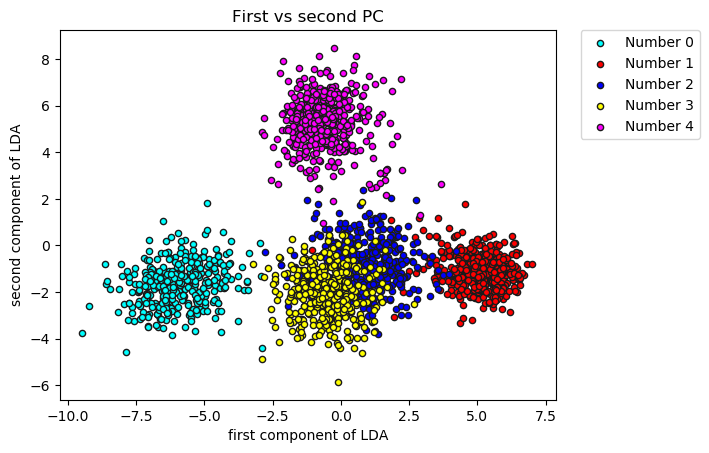

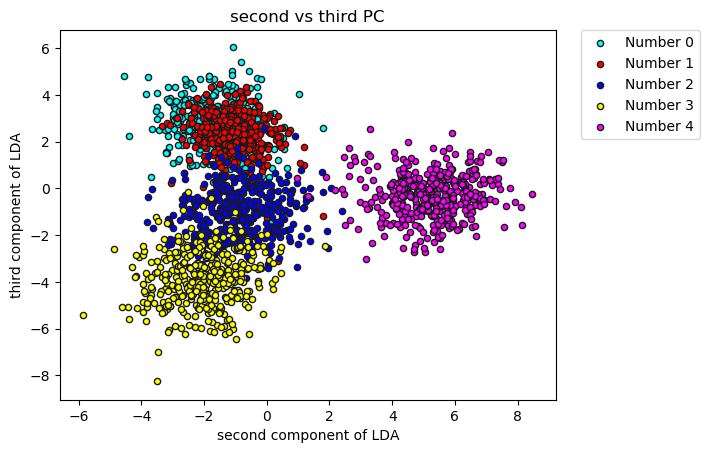

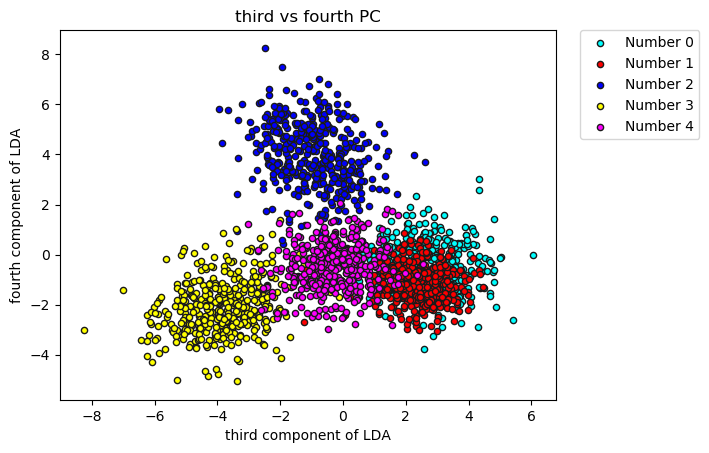

In [23]:
## plot scatter plot of top 4 eigen values from LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# applying LDA on the given dataset
lda_scatter = LDA()
lda_output = lda_scatter.fit_transform(X,y)

# assigning numbers to different classes.
cyan = y == 0
red = y == 1
blue = y == 2
yellow = y == 3
magenta = y == 4

# plotting the scatter plot of the projected data of the LDA with first and second principal components
plt.figure()
plt.scatter(lda_output[cyan,0], lda_output[cyan,1],c = "cyan",s=20,edgecolor = 'k', label = 'Number 0')
plt.scatter(lda_output[red,0], lda_output[red,1],c = "red",s=20,edgecolor = 'k', label = 'Number 1')
plt.scatter(lda_output[blue,0], lda_output[blue,1],c = "blue",s=20,edgecolor = 'k', label = 'Number 2')
plt.scatter(lda_output[yellow,0], lda_output[yellow,1],c = "yellow",s=20,edgecolor = 'k', label = 'Number 3')
plt.scatter(lda_output[magenta,0], lda_output[magenta,1],c = "magenta",s=20,edgecolor = 'k', label = 'Number 4')
plt.title("First vs second PC")
plt.xlabel("first component of LDA")
plt.ylabel("second component of LDA")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

# plotting scatter plot of the projected data of the LDA with the second and third principal componenets
plt.figure()
plt.scatter(lda_output[cyan,1], lda_output[cyan,2],c = "cyan",s=20,edgecolor = 'k', label = 'Number 0')
plt.scatter(lda_output[red,1], lda_output[red,2],c = "red",s=20,edgecolor = 'k', label = 'Number 1')
plt.scatter(lda_output[blue,1], lda_output[blue,2],c = "blue",s=20,edgecolor = 'k', label = 'Number 2')
plt.scatter(lda_output[yellow,1], lda_output[yellow,2],c = "yellow",s=20,edgecolor = 'k', label = 'Number 3')
plt.scatter(lda_output[magenta,1], lda_output[magenta,2],c = "magenta",s=20,edgecolor = 'k', label = 'Number 4')
plt.title("second vs third PC")
plt.xlabel("second component of LDA")
plt.ylabel("third component of LDA")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

# plotting scatter plot of the projected data of the LDA with the third and forth principal componenets
plt.figure()
plt.scatter(lda_output[cyan,2], lda_output[cyan,3],c = "cyan",s=20,edgecolor = 'k',label = 'Number 0')
plt.scatter(lda_output[red,2], lda_output[red,3],c = "red",s=20,edgecolor = 'k', label = 'Number 1')
plt.scatter(lda_output[blue,2], lda_output[blue,3],c = "blue",s=20,edgecolor = 'k', label = 'Number 2')
plt.scatter(lda_output[yellow,2], lda_output[yellow,3],c = "yellow",s=20,edgecolor = 'k', label = 'Number 3')
plt.scatter(lda_output[magenta,2], lda_output[magenta,3],c = "magenta",s=20,edgecolor = 'k', label = 'Number 4')
plt.title("third vs fourth PC")
plt.xlabel("third component of LDA")
plt.ylabel("fourth component of LDA")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

- Question:  Explain the results obtained in terms of the known classes. Which LDA directions separate which classes better (which LDA directions are responsible for separating which classes)?
- Answer: From analysing the above scatter plots of the 1st vs 2nd, 2nd vs 3rd and 3rd vs 4th components of the LDA, we can conclude several points as written below.
    - From the scatter plot of first and second components of the LDA we can say that the second component direction of the LDA classifies class of number 4 well, we can say this statement as if we project the class of number 4 data on the second component we can successfully classify it and there will be no overlapping from other classes. The same way we can also say from the analysis of the scatter plot that the first component direction of the LDA classifies oth and 1st number class well.
    - From the scatter plot of the second vs third components of the LDA we can say that the third component direction of the LDA is able to classify the class of number 3 really well.
    - And from the scatter plot of the third vs fourth components of the LDA we can say that the fourth component direction of the LDA is able to classify the class of number 4 well.
    
- Over all we can conclude that all the components of the LDA together are able to classify all the classes really good.
- As first component of the LDA is responsible for seperation of 0th and 1st number class.
- Second component of the LDA is responsible for the seperation of the 4th number class.
- Third component of the LDA is responsible for the seperation of the 3rd class.
- Fourth component of the LDA is responsible for the seperation of the 4th class.

- (2) Compare the results of the LDA with the results obtained by using PCA.

- From comparing the PCA with LDA we can't fully classify a single class using the direction of principal component of the PCA. Because PCA is unsupervisd learning algorithm, which finds principal component in the direction which provides with the maximum variance irrespective of the class of the label. 
- The LDA is able to classify the classes really well based on the direction of the LDA's component. LDA is supervised algorithm which takes class labels into consideration. LDA reduces dimentionality while preserving as much information as possible, As LDA finds centroids of each class data and then tries to maximise distance between the centroid of each class. Over all due to the method used by the LDA it performs better compared to the PCA. 

### Theoretical Question

- Text answer: Attached at the end of the Question 2 as handwritten notes.

#  Nonlinear Dimensionality Reduction

## Plot

- (1)  kernel PCA

In [24]:
# importing libraries
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA, KernelPCA
import matplotlib.pyplot as plt
import time

# importing data from DataB.csv file
data = pd.read_csv("DataB.csv")

# getting Feature dataset and target value dataset from data.
X = data.drop('gnd',axis=1)
y = data['gnd']
X = X.drop('Unnamed: 0',axis=1) #  do we have to drop both first - index and last target value column
print(X.shape)

(2066, 784)


In [25]:
# Implementing Kernal PCA where kernal is RBF.
import time
kpca = KernelPCA(kernel="rbf", n_components=2,random_state = 42) ## fit_inverse_transform=True, gamma=10
start = time.perf_counter()
X_kpca = kpca.fit_transform(X)  # applying fit_transform to get the output of kernal PCA.
end = time.perf_counter()
processing_time = end - start
print('The processing time of Kernal PCA : ', processing_time)
print(X_kpca)

The processing time of Kernal PCA :  0.7252649000000133
[[ 4.47946556e-02 -2.89697923e-02]
 [-2.98608681e-03  1.19757878e-03]
 [-1.39291810e-02 -9.83176539e-03]
 ...
 [-6.96945582e-04 -5.40092272e-05]
 [ 2.79108408e-03  6.77693812e-04]
 [-2.61774529e-03 -7.31657367e-05]]


- (2) Isomap

In [26]:
# importing the library for Isomap
from sklearn.manifold import Isomap
import time
# Applying Isomap 
Imap = Isomap(n_components=2)
start = time.perf_counter()
X_Imap = Imap.fit_transform(X)
end = time.perf_counter()
processing_time = end - start
print('The processing time of Isomap : ', processing_time)
print(X_Imap)

The processing time of Isomap :  10.5908187
[[ 8706.04995215  -344.12740513]
 [ 8858.82115353  -333.86612857]
 [ 3954.25208909  -926.79502703]
 ...
 [-1338.73814549  5698.9432188 ]
 [-3704.88624029  3550.95627311]
 [-3057.39031266  3058.27240364]]


- (3) Locally Linear Embedding (LLE)

In [27]:
# importing library for Locally Linear Embedding 
from sklearn.manifold import LocallyLinearEmbedding
import time

# Applying LLE to get reduced dimention matrix
LLE = LocallyLinearEmbedding(n_components=2,random_state = 42)
start = time.perf_counter()
X_LLE = LLE.fit_transform(X)
end = time.perf_counter()
processing_time = end - start
print('The processing time of LLE : ', processing_time)
print(X_LLE)

The processing time of LLE :  13.206211600000017
[[-0.04525811 -0.00086215]
 [-0.0450604  -0.00082724]
 [-0.04457275 -0.00092537]
 ...
 [ 0.01156693  0.02228232]
 [ 0.01155446  0.02064809]
 [ 0.01154528  0.01628927]]


- (4) Laplacian Eigenmap

In [28]:
# importing library for Laplacian Eigenmap
from sklearn.manifold import SpectralEmbedding
import time

# applying Laplacian Eigenmap on the dataset to get reduced feature matrix
Laplacian_Eigenmap = SpectralEmbedding(n_components=2,random_state = 42)
start = time.perf_counter()
X_Laplacian_Eigenmap = Laplacian_Eigenmap.fit_transform(X)
end = time.perf_counter()
processing_time = end - start
print('The processing time of Laplacian Eigenmap : ', processing_time)
print(X_Laplacian_Eigenmap)

The processing time of Laplacian Eigenmap :  18.126125300000012
[[ 3.74827714e-03 -1.14693223e-04]
 [ 3.84803136e-03 -1.55366099e-04]
 [ 2.05177929e-03 -8.15044182e-05]
 ...
 [-5.76562883e-04  3.35308606e-03]
 [-6.27513638e-04  2.26301670e-03]
 [-9.43235326e-04  6.63137336e-04]]


- (5) t-SNE

In [29]:
# importing the library for TSNE
from sklearn.manifold import TSNE
import time

# Applying TSNE to get the matrix with reduced dimention
tSNE = TSNE(n_components=2,random_state = 42)
start = time.perf_counter()
X_tSNE = tSNE.fit_transform(X)
end = time.perf_counter()
processing_time = end - start
print('The processing time of T-SNE : ', processing_time)
print(X_tSNE)

The processing time of T-SNE :  31.371279700000002
[[-53.829792    -7.473398  ]
 [-54.410954    -8.69994   ]
 [-43.849453    -0.20623761]
 ...
 [  2.8279006  -48.260284  ]
 [ 12.996245   -42.43855   ]
 [ 25.361555   -48.271217  ]]


## Plot and compare

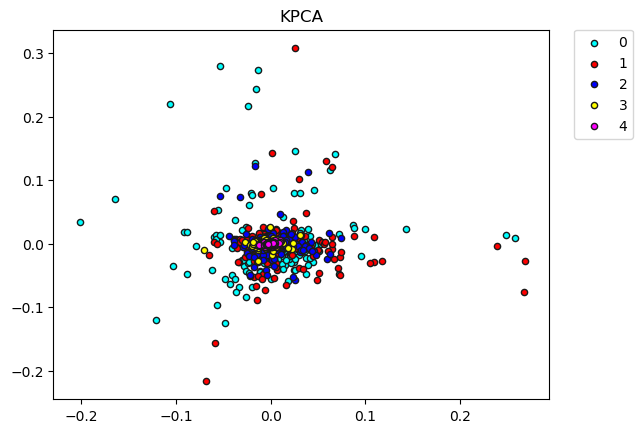

In [30]:
# assigning different colors to different classes.
cyan = y == 0
red = y == 1
blue = y == 2
yellow = y == 3
magenta = y == 4

# plotting scatter plot of the kernal PCA.
plt.figure()
plt.scatter(X_kpca[cyan,0], X_kpca[cyan,1],c = "cyan",s=20,edgecolor = 'k', label = '0')
plt.scatter(X_kpca[red,0], X_kpca[red,1],c = "red",s=20,edgecolor = 'k', label = '1')
plt.scatter(X_kpca[blue,0], X_kpca[blue,1],c = "blue",s=20,edgecolor = 'k', label = '2')
plt.scatter(X_kpca[yellow,0], X_kpca[yellow,1],c = "yellow",s=20,edgecolor = 'k', label = '3')
plt.scatter(X_kpca[magenta,0], X_kpca[magenta,1],c = "magenta",s=20,edgecolor = 'k', label = '4')
plt.title("KPCA")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

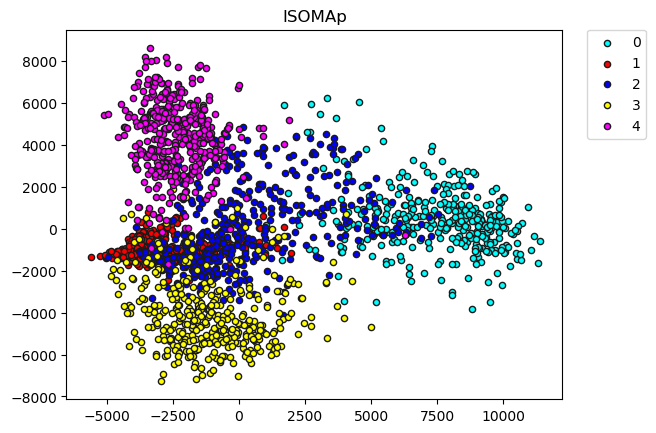

In [31]:
# assigning different colors to different classes.
cyan = y == 0
red = y == 1
blue = y == 2
yellow = y == 3
magenta = y == 4

# plotting scatter plot of the Isomap
plt.figure()
plt.scatter(X_Imap[cyan,0], X_Imap[cyan,1],c = "cyan",s=20,edgecolor = 'k', label = '0')
plt.scatter(X_Imap[red,0], X_Imap[red,1],c = "red",s=20,edgecolor = 'k', label = '1')
plt.scatter(X_Imap[blue,0], X_Imap[blue,1],c = "blue",s=20,edgecolor = 'k', label = '2')
plt.scatter(X_Imap[yellow,0], X_Imap[yellow,1],c = "yellow",s=20,edgecolor = 'k', label = '3')
plt.scatter(X_Imap[magenta,0], X_Imap[magenta,1],c = "magenta",s=20,edgecolor = 'k',label = '4')
plt.title("ISOMAp")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

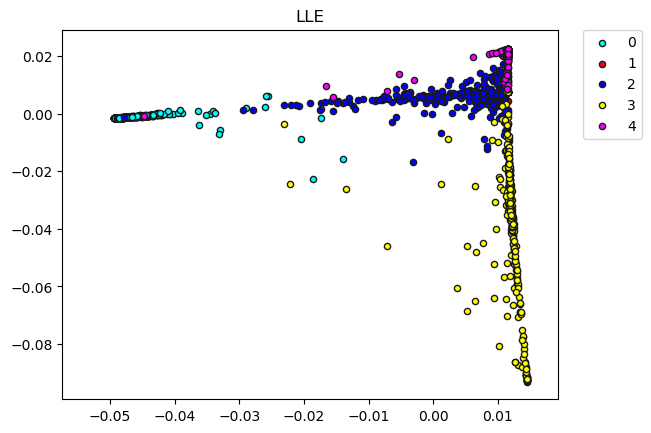

In [32]:
# assigning different colors to different classes.
cyan = y == 0
red = y == 1
blue = y == 2
yellow = y == 3
magenta = y == 4

# plotting scatter plot of the LLE
plt.figure()
plt.scatter(X_LLE[cyan,0], X_LLE[cyan,1],c = "cyan",s=20,edgecolor = 'k', label = '0')
plt.scatter(X_LLE[red,0], X_LLE[red,1],c = "red",s=20,edgecolor = 'k', label = '1')
plt.scatter(X_LLE[blue,0], X_LLE[blue,1],c = "blue",s=20,edgecolor = 'k', label ='2')
plt.scatter(X_LLE[yellow,0], X_LLE[yellow,1],c = "yellow",s=20,edgecolor = 'k', label = '3')
plt.scatter(X_LLE[magenta,0], X_LLE[magenta,1],c = "magenta",s=20,edgecolor = 'k', label = '4')
plt.title("LLE")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

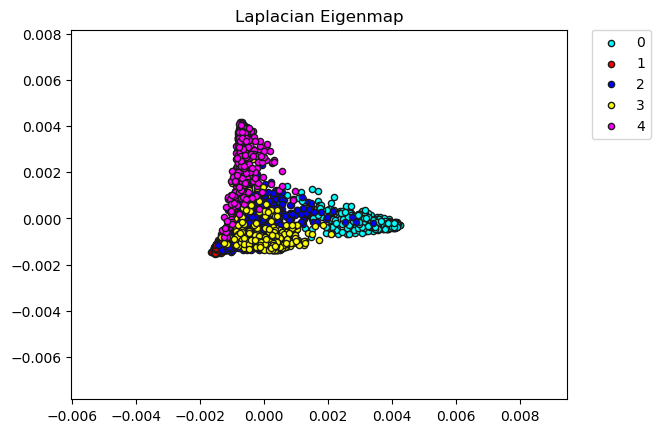

In [33]:
# assigning different colors to different classes.
cyan = y == 0
red = y == 1
blue = y == 2
yellow = y == 3
magenta = y == 4

# plotting scatter plot of the Laplacian Eigenmap
plt.figure()
plt.scatter(X_Laplacian_Eigenmap[cyan,0], X_Laplacian_Eigenmap[cyan,1],c = "cyan",s=20,edgecolor = 'k', label = '0')
plt.scatter(X_Laplacian_Eigenmap[red,0], X_Laplacian_Eigenmap[red,1],c = "red",s=20,edgecolor = 'k', label = '1')
plt.scatter(X_Laplacian_Eigenmap[blue,0], X_Laplacian_Eigenmap[blue,1],c = "blue",s=20,edgecolor = 'k', label = '2')
plt.scatter(X_Laplacian_Eigenmap[yellow,0], X_Laplacian_Eigenmap[yellow,1],c = "yellow",s=20,edgecolor = 'k', label = '3')
plt.scatter(X_Laplacian_Eigenmap[magenta,0], X_Laplacian_Eigenmap[magenta,1],c = "magenta",s=20,edgecolor = 'k', label = '4')
plt.title("Laplacian Eigenmap")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

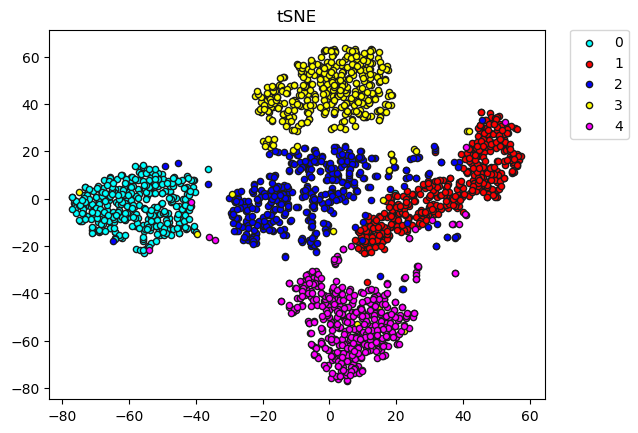

In [34]:

# assigning different colors to different classes.
cyan = y == 0
red = y == 1
blue = y == 2
yellow = y == 3
magenta = y == 4

# plotting scatter plot of the reduced matrix
plt.figure()
plt.scatter(X_tSNE[cyan,0], X_tSNE[cyan,1],c = "cyan",s=20,edgecolor = 'k', label = '0')
plt.scatter(X_tSNE[red,0], X_tSNE[red,1],c = "red",s=20,edgecolor = 'k', label = '1')
plt.scatter(X_tSNE[blue,0], X_tSNE[blue,1],c = "blue",s=20,edgecolor = 'k', label = '2')
plt.scatter(X_tSNE[yellow,0], X_tSNE[yellow,1],c = "yellow",s=20,edgecolor = 'k', label = '3')
plt.scatter(X_tSNE[magenta,0], X_tSNE[magenta,1],c = "magenta",s=20,edgecolor = 'k', label = '4')
plt.title("tSNE")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

- (1) Which method do better on which part of data?
    - We can conclude by analysing the scatter plots of each manifold learning method for feature reduction that t-SNE is the best feature extraction out there. And due to it's amazing results in classification and feature reduction it is used in many places like NLP and speech recognition.
    - After analysing the scatter plot of Kernal PCA (KPCA) we can conclude that KPCA is one of the worst method of feature extraction with non-linear dataset. As we have very high dimention (784) non-linear dataset, KPCA increases it's dimention and then tries to fit a linear dicision boundary. But, due to the complexity/dimentions of the data we can't the expected result.
    - After analysing the scatter plot of Isomap, we can say that Isomap did good job in classifying several classes for example, 0, 3 and 4 classes even these classes have some samples overlapping with other classes. Other classes are overlapping too much. The reason behind this is that the given data is not distributed equally/ uniformly on the non-linear manifold. Because of the non-uniform distribution of the data on the manifold, we are not able to get the right geodesic distance betwen the two samples. In some samples we are able to get very less overlapping because those samples are located in such that we are able to get sum of euclidean distances between two samples (using KNN) very near to actual geodesic distance between those two points. To solve this problem we use LLE.
    - After analysing the scatter plot of LLE, we can say that LLE performs a bit better compared to Isomap as we are not getting much over lapping between different classes. We are able to get okayish distribution of all the classes except class of number 1 as we are not able to classify the red class at all as it's over lapped by other classes. LLE can even work on data which isn't uniformly distributed as it takes clusters of the data from manifold (using KNN) and reconstructs them on the lower dimentions. So, even if we have holes in out dataset it overcomes that issue. But, this method is not able to solve the outliers problem as we can see in the scatter plot. 
    - After analysing the sctter plot of Laplacian Eigenmap, we can say that Laplacian Eigen map solve the outliers problem, and we don't get outlier in the scatter plot of Laplacian Eigenmap, but, we still get overlapping of differnet classes. But, we can say that we are able to classify class 0 and 4 better comapered to other classes. Laplacian Eigenmap solves the outlier problem because it creates edges between the datapoints and then groups classes based on the similarity between points. 
        - The disadvantage of LLE and Laplacian Eigenmap is that they are preserving locality of the points which are closer to each other and not for the points which are away from each other.
    - And finally After analysing the scatter plot of the t-SNE, we can conclude that the t-SNE method is the best method for classification. As it classified the data really well in the reduced dimention, because it preserved local and global structure of data. In t-SNE we compute pairwise conditional probability of each points. 
  

- (2) Give at least three clear performance diﬀerences between a pair of methods that you can explain based on the nature of methods and the data.
    - I selected Isomap and t-SNE to compare based on the nature of methods and the data. Let's cover performance differences between each other.
        - Time of computation: This is one of the biggest differences between both the algorithm, As we can see that Isomap is around 16.57 seconds and the runtime of the t-SNE is around 30 seconds. 
            - This difference is happening because the computational complexity of t-SNE is much higher compared to the computational complexity of the Isomap.
            - In the Isomap we will first construct a K-nearest neighbor graph on all the datapoints. After that we will compute shortest path between all points as an estimation of geodisc distance D(G). After that compute eigen vectors and singular matrix and after that we will multiply them to get the projected output.
            - In case of the t-SNE we first in the high dimentional space we have to create a probability distribution that dictates the relationship between various neighboring points. After that the algorithm tries to recreate a low dimentional space that follows that probability distribution as best as possible. Then we will find the density between points in the higher and lower dimentional space and after that if our density is low then two dataset points are close to each other.
            - So, the t-SNE is much more computationally expensive compared to the Isomap.
        - In Isomap we don't have clear clusters of different classes. But, in the t-SNE we can see clear clusters of the data with no overlapping between classes. That is happening because for Isomap to work correctly we need the data to be uniformly distributed, but that is not the case with the t-SNE algorithm.
        - Unlike Isomap, t-SNE is non-convex meaning it has multiple local minima and is therefore much more difficult to optimize and due to non-convex we can run it multiple times and get a different result each time.
        - t-SNE preserves local and global structure unlike Isomap which only preserves only the local structure that is one more reason why t-SNE performs better compared to Isomap.
             

- (3) What tradeoﬀs might need to be considered in order to decide which method is ’best’ to use for this dataset?
    - After analysing all the scatter plots of the all 5 manifold methods, we can clearly conclude that the best algorithm is t-SNE.
    - The advantages of the t-SNE method are:
        - It handles non-linear data efficiently.
        - It preserves local and global structure.
    - The disadvantage of the t-SNE methods are:
        - Computational complexity - As we can clearly see that t-SNE takes around 25 to 35 second to generate the dimentionality reduced data. Compared to all other algorithm which solves the dimentionality reduction problem approximately under 10 to 15 seconds.
        - Doesn't provide with the same result - If we run it multiple times then it provides different output each time. But, those output are similar to each other. Other methods gives us consistent output. Because t-SNE is non-convex and has multiple local minima.
        - It requires hyperparameter tuning.
        - Noisy pattern - It may also identify pattern in noisy data,so we should run this algorithm multiple time using different hyperparameters to ensure that the output that we are getting is the right output.

# References:

- http://www.vfirst.com/blog/techfirst/dimension-reduction-techniques-pca-vs-lda-in-machine-learning-part-2/

- https://mlexplained.com/2018/09/14/paper-dissected-visualizing-data-using-t-sne-explained/

- https://theprofessionalspoint.blogspot.com/2019/03/advantages-and-disadvantages-of-t-sne.html